In [1]:
%matplotlib notebook
#run this cell once per session so plots will show up inline, rather than in separate figure windows


import math
import numpy as np
#Importing pyplot
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse
from matplotlib.patches import Arc
from matplotlib.patches import Arrow
import matplotlib as mpl


<h1 align="center">Using My DIY Spherometer with Telescope Mirrors</h1>

<h3 align="center"> Some Useful Links </h3>

What is a spherometer and why would you use it? A spherometer is a plane supported by three legs and having
a dial-gauge that measures the distance down to a surface from a point (approximately) in center of the 
triangle defined by the tips of the three legs. Note that the dial gauge can be "zero-ed' to read a
value of zero when the spherometer is placed on a *standard plane* surface with all three legs on the plane 
while the tip of the dial gauge probe is also touching that *standard plane*. Then, when the spherometer is
place on any curved surface, the three legs will *define a plane* and the dial gauge will determine the distance 
to the probed point above or below that plane. That distance is called the **sagittal** height.

Using the measured distances between legs of the spherometer and this sagittal height, it is possible to determine
the radius, $R$, of the measured sphere (or the local radius of curvature, ROC, for a non-spherical surface. 
That measurement can be useful when grinding a telescope mirror.


<figure>
  <p><br>
  <img src="./img/My_Spherometer_Line_Drawing.jpg" width="500" alt="Spherometer Line Drawing" >
     <figcaption style="margin-top:0.5cm;">
         <center>A conceptual sketch of a simple spherometer above a sphere.</center>
     </figcaption>
</figure>


For a nicer picture and a better description, see:  http://www.daviddarling.info/encyclopedia/S/spherometer.html


What is the general formula for calculating $R$ given the spherometer measurements? Trikha and Batia (1958):  https://aapt.scitation.org/doi/abs/10.1119/1.1934619
answer that question. However, the explanation is limited. Hopefully, this Jupyter notebook will help explain the
details and show you how to make the measurements and then compute the spherical radius.

Unfortunately, I found that most of the web resources are either totally wrong, or at least not completely right. 
Even so, many of the of the incorrect formulas do manage to get useful results. Probably because
most spherometers have approximately equilateral legs and because the typical use only needs to be *pretty close*
to the correct answer. In any case, I suggest your read Trikha and Batia, and use the General Formula.

Gordon Waite posted two YouTube videos that made me decide to try to make my own spherometer and learn to use it. 
I recommend them as a good starting point.

First, he shows how to make a spherometer. See:  https://www.youtube.com/watch?v=htBx5SRFeMI


Second, he shows how to makes some measurements and how to compute the radius of curvature for the mirror.
Unfortunately, I think he did get confused with symbols, or maybe picked up a formulat with some errors. 
Still, his example gives some real measurements, which we, too, can use. His calculations are very close 
to similar Trikha and Bhatia results. See:  https://www.youtube.com/watch?v=fLiodHOESYM



<h3 align="center"> The General Formula from Trikha and Bhatia(1958)</h3>

They state that one commonly used formula is based on the assumption that the three legs of the spherometer form 
an perfect equalateral triangle with the pole of the dial gauge in exactly the center and probing 
exactly perpendicular to the plane defined by the spherometer legs. These conditions are never met in pratice, especially 
with do it your self techniques. Consequently, they they solve the equation more generally for when the three edges of the triangle can have different lengths $a_1, a_2$, and $a_3$.

Mathematically, the problem consists in finding out the radius of the circum-circle  (around the legs of the spherometer) 
and relating it to $R$, the radius of curvature of the sphere being measured. See **Figure 1**, above, for a representation of the problem, the placement of the spherometer, and the measurements to be made and values we will need to calculate. 
Note, in this section, I will give the formulas without motivation and without proof; however, I'll show the proofs later. 

The radius, $\rho$, of the circum-circle of a triangle with length of sides as $a, b$, and $c$ is given by

$$\rho = \frac {a b c} {4 \sqrt{s(s-a)(s-b)(s-c)}}$$

where $$s = \frac {a+b+c} {2}$$. N.B., the Trikha and Bhatia paper is a scanned version of the journal and the root 
is not perfectly readable. However, they do state that when $a=b=c$, which is the ideal case, 
$\rho = a\   / \sqrt{3}$. This statement can be used to show that the formula read square root, rather than cube root.

Once we know the radius of the spherometer, $\rho$, then $R$, the radius of the measured sphere that has a sagita, $h$, is:

$$R= \frac {h}{2} + \frac{a^2 b^2 c^2} {32 h s (s-a) (s-b) (s-c)}$$

Of course for practial telescopes, $h/2$ is negigible because $h$ is typically a small fraction of an inch, while the next term is generally many inches.



<h3 align="center"> Let's use Gordon Waite's data with the Trikha and Bhatia equation </h3>

Waite made measurements $a=4.820$, $b=4.800$, and $c= 4.791$ inches between his spherometer legs. 
He also measures his DIY spherometer radius to be $\rho=2.7734$, though he calls it R.

He then measures the pre-cut curve on a 10 inch f6 mirror blank. So, the focal point should be 
$D \times f = 60$ inches from the mirror surface, and the RoC would be $2 \times \text{focal distance} =\ 120$ inches.

He measured $h$, the sagitta, to be 0.0315 inches. He then computes the the RoC to be 121.95. However, I think
his formula is slightly problematic. He does get close to the advertised delivered radius of 120 inches though.

How do we do with Trikha's and Bhata's general equation using Waite's measurements?  The calculation 
in the next cell gives $R=122.1$ inches.

Basically, we find approximately the same number as Waite, even though the formulas are different from 
formula (1) in Trikha and Bhata.  Apparently, just about any reasonable estimate and a spherometer that has
nearly equilateral leg tips, must give a fairly robust estimate of $R=2F$ and $F$.
     

In [28]:
#Data from Gordon Waite... see his YouTube videos
a=4.820
b=4.800
c=4.791
#we won't use his rho, we will use his sagittal measurement, h, which we might get differently    (rho = 2.7734)

h  = 0.0315 
#calculations:

s = (a + b + c)/2.0
R = h/2.0 + (a*a * b*b * c*c) / (32.0*h*s*(s-a)*(s-b)*(s-c) )

print("R=", R)

#we would have used a slightly different rho, though.
rho = (a*b*c) / (4.0*math.sqrt(s*(s-a)*(s-b)*(s-c)))
print("rho=", rho)

R= 122.10916645144385
rho= 2.773424820766008


# Trying to use my homemade spherometer to measure the ROC

Of course, when I move my spherometer around over the bottom of any
of my household bowls, the dial gauge swings around wildly. This non-constant ROC is an indication that not a single one
of my bowls is even close to being an actual spherical shape.


**MY NEW PLAN** is to go to the library and try to measure one of their **GLOBES**.   

**_______   Well, that was disappointing, our library system no longer has World Globes, Unbelievable!   ______**

### In the meantime, I found a small concave 'makeup' mirror

<hr>
<figure>
  <p>
  <img src="img/MadisonAndMakeupMirror.jpg" width="800" alt="Makeup mirror" >
     <figcaption
         style="margin-bottom:2cm;">
         <center>Madison playing with the makeup mirror...Oh, what big eyes your have!.</center>
     </figcaption>
</figure>

<hr>

<figure>
  <p>
  <img src="img/MadisonAndSpherometer.jpg" width="350" alt="Radius of Curvature" 
       style="transform:rotate(90deg);">
     <figcaption style="margin-top:1.5cm;">
         <center>Madison measuring the Radius of Curvature of the makeup mirror.</center>
     </figcaption>
</figure>

**Madison and I measured the sagittal height, h=0.311 inches**.

<hr>

<figure>
  <p>
  <img src="img/MadisonFindingSagittal_h.jpg" width="350" alt="Reading the Dial Gauge">
     <figcaption style="margin-bottom:1.5cm;">
         <center>Reading the dial-gauge to determine the saggital depth, h.</center>
     </figcaption>
</figure>


I also attempted to measure the distance, $F$, to the tightest focus for an image of the Sun outside in the bright sunlight,
from which one can determine the $R=2\times F$. Recall that the radius of the sphere is twice the focal length for spherical mirrors.

<figure>
  <p><p><p>
  <img src="img/EstimatingFocusWithSun.jpg" width="800" alt="focusing the sun"
       style="transform:rotate(90deg); margin-top:3.5cm;">
     <figcaption  style="margin-top:3.5cm;">
         <center>Measuring the distance from the mirror to the focused image of the sun to estimate $F=R/2$.</center>
     </figcaption>
</figure>

<hr>
<hr>
I measured somewhat less than two and a half inches, but clearly more than two inches, hence:

$$R=2F\leq 2\times 2.5 \approx 5$$.


When I run the code below, **I get R=4.5**, which is, I feel, well within my likely errors,
given the depth of the mirror and my troubles making an accurate, 'tape measure', reading.


<hr>


In [29]:
#Measurements of a small makeup mirror
#a,b, and c are the distances between the touching points of the legs of my spherometer
#I painted the tips of all three legs with a bit of ink from a felt tipped marker and pressed the 
#sphereometer down onto a piece of white paper, leaving 3 tiny dots.

#I used my new digital micrometer to measure the triangle edge lengths (in inches)

a=2.9055
b=2.8315
c=2.8275

#My dial gauge indicated that the sagittal depth at the bottom of the bowl, h, was:
#    small makeup mirror
h  = 0.311                #0.311 #inches
#calculations:

s = (a + b + c)/2
R = h/2.0 + (a*a * b*b * c*c) / (32.0*h*s*(s-a)*(s-b)*(s-c) )

print("R=", R)

#we would have used a slightly different rho, though.
rho = (a*b*c) / (4.0*math.sqrt(s*(s-a)*(s-b)*(s-c)))
print("rho=", rho)




R= 4.525301435739641
rho= 1.6486408017000114


## The math behind the use of a spherometer

When I initially wrote the previous sections, I only had the spherometer equation. I had seen a few comments in Stackoverflow that suggested how to solve for the Radius of Curvature given spherometer geometry measurements. However, I didn't understand how the equation came about. In searching the internet for the derivations of these formulas, I found 
suggestions included using determinates and analytic geometry, others were optimization based ideas. All of these approaches were by coders, and for coders, which is fine ... a solution is a solution. However, there is something beautiful about doing the actual geometry and algebra to derive the required equations.

I have, *finally*, thought about the geometry sufficiently, and have remembered, or looked up enough math to be able to derive the equation in Trikha and Bhatia. The proofs require no calculus and no explicit linear algebra with matrix solutions; though the sets of equations do have to be solved using, sometimes messy, simple algebra.

I wanted to write this up for various reasons. First, I'll probably need to be able to come back to it some time in the future, and I'd like to be able to understand it when I do need it again. Second, there is a kind of beauty in the math that gets us to the sphereometer equation. Third, and perhaps most importantly, I wanted to call some attention to the historical path that leads from the first inklings of geometry, to the lion himself, Newton, who built the first reflecting telescope, and from there out to the stars and the edges of the universe. It is a magestic story.

Before we deeply consider the derivation, let me very briefly, and conscisely describe the heart of the proof, which involves finding the radius of curvature of a spherical mirror using only a spherometer, which itself has been carefully measured so that we know the distances between the end points of its three legs that touch the surface of the mirror (which is the physical and accessible part of the mathematical sphere in question).

**The problem has only two parts:**

**First**, given the sagittal measurement, $h$, and the calculation of the radius, $\rho$ of the circle delimiting the edge of a thin section sliced from the sphere, **determine** its unknown radius, $R$. This calculation
<span style="color:red">**requires the chord theorem**</span> for the products of intersecting chord lengths, and results in a solution for $R$ that only depends on the measured sagittal height, and the calculated value of $\rho$ which is wholely determined by the physical, measurable geometry of the spherometer. 

**Second**, given access to the physical spherometer, **measure the distances between the three legs**, and then **calculate** the radius $\rho$ of the circle that circumscribes those three points. This calculation <span style="color:red">**requires the central angle and inscribed angle theorem**</span> to determine a relationship between the area of the triangle between $\rho$ and the spherometer legs. Efficient calculation of that area, i.e., without trig, also <span style="color:red">**requires the use of Heron's formula**</span> for finding a triangle's area using only 
the triangle's edge lengths. 

**That is it, just two calculations!**


**I will, now, begin with a rough outline of the derivation of the spherometer equation.**

Once we have a vision of where we begin, and what we will need to understand in order to go from a spherometer
measurement to the radius of the measured sphere, I will return to the required theorems and provide the details. 

To start and to provide very physical motivations, imagine that we have a slice from sphere and, to make things 
concrete (and very tasty, let us imagine that our slice came from a spherical watermelon (see Figure 1). That (sagittal) slice reveals a circle of juicy red goodies, and on the extreme outside we see a very thin circle of green skin 
(see Figure 2).


<figure>
  <p>
  <img src="img/spherical_melon_uncut.jpg" width="400" alt="Picture 21" title="Picture 1" >
     <figcaption>
         <center>Figure 1.  A more or less spherical watermelon.</center>
     </figcaption>
</figure>


<figure>
  <p>
  <img src="img/Sliced_melon.jpg" width="400" alt="Picture 21" title="Picture 1" >
     <figcaption>
         <center>Figure 2.  Melon after a single (sagittal) slice.</center>
     </figcaption>
</figure>

Further assume that for some reason the rest of the melon is no longer available to us ("Who ate the rest of
my watermellon!?"); so, we cannot directly measure the melon's full radius, $R$. We can, however, still make measurements of the remaining, thin slice of melon, with which we hope to find $R$. 


We are particularly interested in two measurements: the thickness, $h$ of the sagittal slice and the diameter (or more usefully, the radius, $\rho$) of the circle defined by the green skin revealed by our slicing. We will also have to do some non-obvious measurements of our spherometer's fixed realization, and then make calculations to discover the desired radius $R$.  

First, we note down the thickness of this thin slice, $h$, which is called the sagittal measurement (see Figure 3). 

<figure>
  <p>
  <img src="img/h_forMelonSaggitalSlice.jpg" width="400" alt="Picture 21" title="Picture 2" >
     <figcaption>
         <center>Figure 3.  Sagittal slice thickness would actually be measured by the dial guage of the spherometer; the melon offers a simpler measurement.</center>
     </figcaption>
</figure>

Next, it turns out that the diameter of circle of green skin is what we will really need (which is not at all obvious right now, but it will be explained later). Because we are imagining a physical watermelon, it is tempting to suggest that we grab a ruler and just measure across the diameter of our slice. However, for a real telescope mirror (unlike our slice of watermelon) the slice determined by the legs of a spherometer is not really physical. So we will have to make the measurement in a more round about way, which I'll explain as we go along. However, we be able to find that diameter.

To be a bit clearer about the actual problem of measuring the radius of curvature of a spherical mirror, we would need to grind away at our watermelon slice removing all of the read meat, and white rind while leaving only that thin green skin. 
After all that grinding, the skin is much more like the inner surface of a concave spherical mirror. For a real mirror, we would have to measure the inside of the surface of the sphere, which is why we are imagining grinding away the red and white parts of the melon. To make the measurement we will use a spherometer, which is an instrument with three legs that just touch the green circle and a dial gauge that reaches down from the plane of the slice to measure the sagittal distance, $h$, reaching to the skin on the top of our slice. 

When I wrote this section, I didn't actually have a spherometer; so, I couldn't actually measure the distances between the end points of the three legs. So, I just stuck some pins into the melon to represent where some such instrument would have touched the skin of the melon, see Figures 4a and 4b.


<figure>
  <p>
  <img src="img/SphericalMelon_sagitalSliceW3points.jpg" width="400" alt="Picture 21" title="Picture 1" >
     <figcaption>
         <center>Figure 4a.  Pins marking points where the spherometer legs defined the sagittal slice plane.</center>
     </figcaption>
</figure>

<figure>
  <p>
  <img src="img/measuringLegDistancesOfSpherometer.jpg" width="400" alt="Picture 21" title="Picture 1" >
     <figcaption>
         <center>Figure 4b. Measuring the distance between the same three points defining the sagittal plane; here also showing the rest of the sphere.</center>
     </figcaption>
</figure>


Figuring out how to make the other required measurement, the radius, $\rho$, or diameter, $2 \times \rho$, will require some geometry; but first, here is the motivation for why that diameter is so important.
 

One reason we need the diameter is because it hurts my head to think about all this 3D stuff; I'm much happier thinking about plane geomety. So, let's see how to use that diameter to reduce our sphere to the simpler 2D case of a circle. 

Pick any diameter across the circle of our mirror or melon slice. Label the ends of that diameter $F$ and $G$ (think of **F**ind a **G**reat circle), see Figure 5. Sure enough, there is a great circle going around the original sphere that intersects the selected diameter at points $F$ and $G$. 

OK, we will wor with that great circle, instead of the sphere itself. Obviously, they both have the same radius, $R$, and 
are cut to have the same sagittal distance, $h$, to a chord passing through $F$ to $G$, and the chord $FG$ 
has a length of $2 \times \rho$. We will eventually show how to compute the actual value of $\rho$; but for now, just treat $\rho$ as a known measurement.




<figure>
  <p>
  <img src="img/2xRhoANDassociatedGreatCircle.jpg" width="400" alt="Picture 21" title="Picture 1" >
     <figcaption>
         <center>Figure 5. Knowing a sagittal radius, we recognize that it defines a Great Circle through points $F$ and $G$, here the red and blue pins, which reduces our problem to plane geometry!.</center>
     </figcaption>
</figure>

Having reduced the problem to just two dimensions, we consider the relationship between the lengths of a circle's radius, $R$, and the length of its chord, $2 \times \rho$ and the sagittal height, $h$. Having the latter two measurements allows us to solve for the desired, but unknown, radius, $R$, after applying a bit of tricky, but very cool, geometry fact called the intersecting chords theorem. Very importantly, after finding $R$, we can get back to grinding on our mirror and making the rest of our telescope.

That is the general description of what we need to investigate. Before proving all this stuff, I will work backwards, just writing down the equations as we move back toward how the sphereometer actually makes the required measurements.

### R as a function of the chord length and the sagitta

$$R = \frac{h}{2} + \frac{ChordLength^2}{8 \times SagitalHeight}$$


$$R  = \frac {h}{2} + \frac{\rho^2}{2h}  \qquad(1).$$


### The cord length is the diameter of the circum-circle around the spherometer base 


Given the measured edges ($a$, $b$, $c$) of the triangle formed by the three legs of the spherometer, the radius of the spherometer is known to be

$$\rho = \frac{abc}{2 \times AreaOfTheCircumscribedTriangle} \qquad (2).$$


### Heron's formula finds the area of a triangle given its edge lengths $a$, $b$, and $c$

Compute the semi-perimeter (half of the edge lengths around the triangle, $s$, then find the triangle's area
by Heron's Formula

$$s=\frac{a+b+c}{2},$$

$$Area=\sqrt{s(s-a)(s-b)(s-c)}   \quad \biggr\rvert_{\Large{s=\frac{a+b+c}{2}} }   \qquad (3).$$


## Make the required physical measurements, $a$, $b$, $c$, and $h$

### Find the lengths of the triangle edges of the sphereometer

By carefully rolling a thin coat of paint or ink onto a known plane surface, and then by gently touching the 
sphereometer to this painted surface a tiny bit of paint can be depositied just on the points at the end of the 
spherometer legs. When the spherometer is placed on a clean piece of a paper above a plane surface, these points will be marked.

After making these three ink marks, use a caliper (typically a fairly good one with 0.001" resolution) 
to measure the distances $a$, $b$, $c$ between the centers of these paint marks.

### Find the sagittal distance from the plane defined by the tips of the spherometer legs

By placing the spherometer on a known plane surface, one can zero the dial gauge, which measures down to a point 
perpendicular to the plane defined by the three points of the spherometer leg tips. With the, now zeroed, 
dial gauge placed on the surface of the sphere, one can read of the sagittal distance (i.e., conceptually 
the thickness of the slice of the watermelon). 

$$h=\texxt{ the Direct Measurement From Dial Gauge.}$$


##  Use these four physical measurements, $a$, $b$, $c$, and $h$, to compute R


$$R = \frac{h}{2} + \frac{a^2 b^2 c^2}{32 h s (s-a)(s-b)(s-c)} \qquad (4).$$


Ta da! How about that!

Now recall that the focal length for a spherical mirror is half the radius, $R$.


$$FocalLength = \frac{R}{2} = \frac{h}{4} + \frac{a^2 b^2 c^2}{64 h \rho (\rho-a)(\rho-b)(\rho-c)} \qquad (5).$$

And just to be complete, don't forget that the f-alue of a mirror times the mirror diameter is also $R$, the radius of the sphere. So, a smaller $F$ means a shorter focal length, and mirrors with shorter focal lengths are also called *faster-*mirrors (the light path is shorter).

$$\text{Focal Length} =\frac{R}{2}= \frac{F_{mirror} \times \text{Diameter of the mirror}}{2} \qquad (6).$$




# Details of the derivation

Heron (also called Hero), has been given credit for the theorem showing how to calculate the area of a triangle from just the lengths of the edges. However, Archimedies is believed to have proved it first. There are several ways to prove the theorem, and many generalizations of the basic idea. Unfortunately, all of them are complicated and messy. So, please
feel free to skip the section proving Heron's Theorem and just take it on faith that the algebra works out, 
or you may dig in and enjoy yourself.

Because the other theorems are not so messy, I will deal with them before deriving Heron's formula. Note that this order is not circular reasoning, but is just for clarity of the main parts of the total derivation.



## Prove: The central angle of a given chord is twice the inscribed angle of that chord

The central angle of a chord in a circle is defined to be the angle from the center of the circle out to each end of the chord. The inscribed angle is similarly defined to be the angle from a point on the circle back to the chord end points; however, *I believe this point must be on the part of the circle below the chord*.

**Show that for any chord, the central angle is twice the inscribed angle for the same chord.**

Consider a circle with center $O$ and a chord with end points $A$ and $C$. The central angle is $\angle AOC$.
Let $B$ be some point on the circle (but, below the chord, and not $A$ or $C$). What is the relationship with the inscribed angle at $B$ and corresponding central angle at $O$?

*There are three cases to be considered.* Either the point $B$ is the end of a diameter from a chord end, or $C$ is such that the inscribed angle includes the center of the circle, or alternately, $B$ is such that the inscribed angle does not cover the center of the circle. Each case will be considered separately, because the latter two cases depend on having already proved the case at the end of a diameter.


**case 1:**
If $B$ is on the diameter from a chord end, then label that chord end such that $BC$ will be that diameter.
Now the central angle $\angle AOC$ is an exterior angle for the $\triangle AOB$, which is also an equalateral triangle
having two edges of length $R$. Because this central angle is an exterior angle for an equilateral 
we have $\angle ABO = \angle BAO$.  So,

$$TheCentralAngle = \angle AOC = 2 \times \angle ABO = 2 \times TheInscribedAngle$$,

which was to be proven for this first geometric case.

**case 2:**
If the inscribed $\angle ABC$ does not cover the cover the center of the circle, then draw a new diameter from $B$ through $O$ the a new point $D$ at the other end of the diameter. Case 1 now applies to various arcs and chords such that we can prove the case by subtracting various angles to get the ones we need.
For the chord $CD$ case 1 applies and $\angle COD = 2 \times \angle CBD$. 

For the chord $AD$ case 1 applies and $\angle AOD = 2 \times \angle ABD$.


**case 3:**
If the inscribed $angle ABC$ does not cover the circle's center, $O$, construct a new diameter from$B$ through $O$ and on to $E$ at the other end of the diameter. Now note that case 1 applies for a the chords $AE$ and $BE$. Clearly $\angle EOB = 
\angle EDB$. Equally, $\angle AOE= 2 \angle ADE$. By subtraction $\angle ADB = 2 \angle ADB$.


## Prove: The intersecting chord theorem

Consider the following figure showing two arbitrary, intersecting chords. The Intersecting Chord Theorem states that 
**the product of the lengths of the parts of one chord will equal the product of the 
lengths of the two parts of the other chord.** N.B., think of this as saying the of rectangles with sides equal to the parts of one chord will be the same as the area of a rectangle with sides equal to the lengths of the other chord parts.



<figure>
  <br>
  <img src="./img/IntersectingChordTheorem.jpg" width="650" alt="Intersecting Chords" >
     <figcaption>
         <center>
            The Intersectiong Chord Theorem shows the product of a chord's parts is the same for either chord.
         </center>
     </figcaption>
     <br>
</figure>


Draw the circle and the two intersecting chords such that chord $AC$ falls accross chord $BD$. Then proceed with a proof based on similar triangle proportions.

Let the point where the chords intersect be called $S$. Observer that $\angle ASD = \angle BSC$ because they are opposite angles. 

Now consider the inscribed $\angle DAC$ across from chord $DC$, which would be half the angle of that chord's central angle. Note that $\angle DBC$ is also half of that same central angle angle; so, $\angle DBC$ must be equal to $\angle DAC$, by the central angle, inscribed angle theorem.

The other angles, $\angle ADB$ and $\angle ACB$, are equal by the same reasoning, or just because the sum of angles in a triangle must add up to $180^o$. Either way, $\triangle ADS$ is similar to $\triangle BSC$; so, corresponding edges will have the same ratios for these similar triangles.

$$\frac{||AS||} {||SD||} = \frac{||BS||} {||SC||}.$$

Without loss of generality, the products of intersecting chord parts will always be equal to each other.


## Prove: The radius of a circum-circle is function of the area and the edge lengths of the circumscribed triangle


Consider the following figure showing a $\triangle ABC$ with opposite edges of length $a$, $b$, and $c$ and the
circumscribed circle with radius of $\rho$. 


<figure>
  <br>
  <img src="./img/AreaByTrig.jpg" width="600" alt="Picture 21" title="Area of triangle by trig." >
     <figcaption>
         <center>The area of the triangle by Triginometry and the relationship to the radius $\rho$.</center>
     </figcaption>
</figure>



Construct the circum-circle for these three
vertices. Each line $AB$, $BC$, and $AC$ is a chord of this circum-circle by construction. Choose one of these chords, say $AB$. Draw the lines from the ends of this chord $AB$ to the center of the circle at $O$.

Now by the central-angle and circumscribed angle theorem, above, we know that the $\angle AOB = \frac{\angle ACB}{2}$.

Construct a perpendicular bisector along the chord $AB$, at point $D$, to halve that central angle and to simultaniously halve the chord length $AB$. (N.B., perpendicular bisectors of chords pass through the center of the circle, and the formed triangles are both right triangles having an edge of length $\frac{c}{2}$, and another of length $\rho$, the radius of the circum-circle.

Hence, the two right $\triangle AOD$ and $\triangle DOB$ are equal and in particular $\angle DOB = \angle ACB$.

By the usual triangle area equation we know the area of $\triangle ABC = \frac{b a \sin \angle ACB}{2}
= \frac{a b \sin \angle ACB}{2}$.

Now consider the following figure, which show how to compute the triangle's area while avoiding the need to
compute $\sin \angle DOB$.


<figure>
  <br>
  <img src="./img/AreaOfTriangleByHeron.jpg" width="600" alt="Using Area by Heron" 
      title="Finding the radius $\rho$, by Heron." >
     <figcaption>
         <center>By using Heron's formula, we find the circle's radius, $\rho$, as a function of the edge lengths.</center>
     </figcaption>
</figure>


We just showed that $\angle ACB = \angle DOB$. We note by inspection that $\sin \angle DOB = \frac {\frac{c}{2}}{\rho} 
= \frac{c}{2 \rho}$.

Consequenly, the area of $\triangle ABC = \frac{1}{2} {ab} \frac{c}{2\rho} = \frac{abc}{4 \rho}$

Rewriting to find the radius, $\rho$ of the circum-circle, we finally get

$$\rho = \frac {abc}{4 \times Area \triangle ABC}.$$

It may be difficult to measure the angles to use this formula, in which case it may be easier to find the area by Heron's formula. In this alternate formulation we find that

$$\rho = \frac {abc} {4 \sqrt{ s(s-a)(s-b)(s-c) }}  \quad \biggr\rvert_{\Large{s=\frac{a+b+c}{2}}}$$.
 
 
 



## Prove: The radius, $R,$ of a circle is $R=\frac{SagittaHeight}{2}+\frac{ChordLength^2}{8h}$


**Show that $R = \frac{SagittaHeight}{2}+\frac{ChordLength^2}{8h}$ **; equivalently, show $R = \frac{h}{2}+\frac{(2\rho)^2}{8h} = \frac{h}{2} + \frac{\rho^2}{2}$

Consider the following figure, and in particular, the chord, $FG$ and a second chord that is a diameter and a perpendicular bisector of $FG$.  



<figure>
  <p><br>
  <img src="./img/SagittalAndPerpendicularDiameter.jpg" width="600" 
       alt="Sagital Chord intersecting perpendicular diameter" >
     <figcaption style="margin-top:0.5cm;">
         <center>Case 1: Sagittal chord of length $2\rho$ intersecting a perpendicular diameter of lenght $2R$.</center>
     </figcaption>
     <br>
</figure>




The lengths of segments for $FG$ are both $\rho$, while the lengths of the segments for the second chord are $h$ and $2R-h$.

By the intersecting chords theorem, know that the products of a chord's segment lengths are equal to the products of the segment lengths of any other intersecting chord. Hence,

$$\rho^2 = h \times (2R-h)$$

Solving for $R$ gives

$$R= \frac{h}{2} + \frac{\rho^2}{2h}.$$

which was to be shown.


## Prove: The Spherometer Formula, $R=f(SpherometerGeometry, SagitalHeight)$

The three points of the spherometer legs form a triangle and define a plane slicing through the sphere being measured. 
The dial-gauge of a zeroed spherometer directly measures the sagital distance, $h$, from the surface of the measured sphere 
down to the plane defined by the three points of the spherometer's legs touching the sphere.

By Heron's formula, the area of the triangle ABC with edge lengths $a, b,$ and $c$ defined by the legs of the spherometer is

$$Area=\sqrt{s(s-a)(s-b)(s-c)} \quad \biggr\rvert_{\Large{s=\frac{a+b+c}{2}}}$$

As shown above, the radius of this same circum-circle is

$$\rho=\frac{abc}{(4 \times AreaOfTriangleABC)}$$

Consequently,
$$\rho = \frac{abc} {4  \sqrt{s(s-a)(s-b)(s-c)} } \quad \biggr\rvert_{\Large{s=\frac{a+b+c}{2}}}$$

Obviously, the diameter of this circum-circle is $2\times \rho$, and this diameter is a chord of a great circle for
the sphere, where this Great Circle passes through the center of the circum-circle defined by the spherometer leg end points.

The length of this chord is

$$\chi = 2 \rho =  \frac{abc} {2  \sqrt{s(s-a)(s-b)(s-c)} } \quad \biggr\rvert_{\Large{s=\frac{a+b+c}{2}}}$$

Now considering this two dimensional great circle, and using the previously derived formula for the radius of a 
circle when we now a chord length and the sagitta above that chord, we see that the radius of sphere under consideration 
must be

$$R=\frac{h}{2}+\frac{ChordLength^2}{8h}$$

$$= \frac{h}{2}+\frac{\chi^2}{8h}$$

And thus we find the mirror's Radius of Curvature to be

$$R = \frac{h}{2}+\frac{a^2b^2c^2} {32 h s(s-a)(s-b)(s-c) } \quad \biggr\rvert_{\Large{s=\frac{a+b+c}{2}}}$$

with a focal length of $F=\frac{R}{2}$.


## Prove: Heron's Formula


Originally, I intended to punt on proving this formula and merely point the reader at 
http://mathworld.wolfram.com/HeronsFormula.html


That page has an interesting discussion of various beautiful ways to express Heron's Formula with determinates or matrices. It explains that Heron's predecessor, Archimedies, probably found the formula. Heron's proof is "ingenious but extremely convoluted, bringing together a sequence of apparentlyunrelated geometric identities and relying on the propertiesof cyclic quadrilaterals and right triangles."

A more accessible proof (see *Introduction to Geometry*, 2nd ed. New York: Wiley, p 12, 1969) is outlined, which uses the law of cosines (see http://mathworld.wolfram.com/LawofCosines.html). I decided to do all the messy algebra as per tht approach.



## The Central Angle and Inscribed Angle Theorem

### A handy highschool geometry theorem that we will use 

The (smaller, at least for our uses) angle between any two radii of a circle is called a **central angle**.

If one draws two chords intersecting at a single point on the circumference of the circle, then angle between them is called the **inscribed angle**.

**The Central Angle and Inscribed Angle Theorem** states the (surprising) fact that when the central angle and an inscribed angle both span the same chord, then the central angle is twice the inscribed angle.

**Proof:**  There are three cases to consider. It is convenient to begin with the case where one of the central angle radii lies directly on a diameter, which is also a leg of the inscribed angle across the same chord (see Figure 2). Noting that the central angle is an exterior angle of the
isosceles $\triangle ABC$, it follows that the $\angle CAB = \angle CBA$
and $\angle CAB + \angle CBA$ equals the central angle.So, the central angle is twice the
inscribed angle, which was to be shown.



<figure>
  <p><br>
  <img src="./img/CentralAngleTheorem_Case_1.jpg" width="500" alt="Case 1" >
     <figcaption style="margin-top:0.5cm;">
         <center>Case 1: Central angle along diameter defined by the inscribed angle.</center>
     </figcaption>
</figure>


The next case has the central angle completely within the inscribed angle; i.e., the edges of the central angle only intersect at the circumference (see Figure 3). Consider a diameter running from the inscribed angle through the center of the circle, which thus creates two examples of our first case (the inscribed angle has a leg coincident with a leg of the central angle). As each of the newly created central and inscribed angles are such that their central part is twice the inscribed part, clearly their corresponding sums are also in the same ratio. So, the original, central angle is twice that of original, inscribed angle, which was to be shown.



<figure>
  <p><br>
  <img src="./img/CentralAngleTheorem_Case_2.jpg" width="500" alt="Case 2" >
     <figcaption style="margin-top:0.5cm;">
         <center>Case 2: Central angle within the inscribe angle.</center>
     </figcaption>
</figure>





The third and final case to be considered is the case where one of the legs of the inscribed angle intersects one of the legs of the central angle somewhere between the terminations of that radius (see Figure 4).



<figure>
  <p><br>
  <img src="./img/CentralAngleTheorem_Case_3.jpg" width="500" alt="Case 3" >
     <figcaption style="margin-top:0.5cm;">
         <center>Inscribed angle does not includ the center of the circle at all.</center>
     </figcaption>
</figure>


## We will start deriving the Law of Cosines using Analytic Geometry.


**Prove Heron's Formula (by way of the law of cosines):**

To understand the **Law of Cosines** consider the next figure with $\triangle ABC$, which has corresponding, but oppsite edges with lengths denoted as $a, b, c.$ 


<figure>
  <br>
  <img src="./img/LawOfCosines.jpg" width="600" alt="Law of Cosines" 
      title="The Law of Cosines." >
     <figcaption>
         <center>
            The relationship between an opposite edge and $\cos$ of the between adjacent edges, by Analytic Geometry.
         </center>
     </figcaption>
     <br>
</figure>



The law of cosines states:

$$cos \angle CAB = \frac{b^2+c^2-a^2}{2bc}$$

To see this result, consdider the distance between B and C (the edge across from $\angle CAB)$, which can be written as:

$$a = \sqrt{ (c-b\cos{\angle CAB})^2 + (0 - b\sin{\angle CAB})^2 }.$$
$$a^2 =      (c-b\cos{\angle CAB})^2 + (0 - b\sin{\angle CAB})^2   $$
$$    =       c^2 - 2bc\cos{\angle CAB} + b^2 \cos^2{\angle CAB} + b^2 \sin^2{\angle CAB} $$
$$    =       c^2 + b^2(\cos^2 \angle CAB + \sin^2 \angle CAB)  - 2 bc\cos \angle CAB     $$

So, 

$$a^2 =       c^2 + b^2 - 2bc\cos \angle CAB.$$

Giving the law of cosines:
$$\cos \angle CAB = \frac{b^2 + c^2 -a^2}{2bc}$$.

### We have the area of the triangle by trig using $sin$, so we rewite rewrite the Law of Cosines

Using $\sin^2 + \cos^2 = 1$, or $\sin = \sqrt{1-\cos^2}$, we can write:

$$\sin \angle CAB = \sqrt{ 1 - \frac{(b^2+c^2 - a^2)^2}{(2bc)^2}}$$

$$\sin \angle CAB = \frac{\sqrt{4b^2c^2 -   (b^2+c^2 - a^2)^2}}{2bc}     $$

$$\sin \angle CAB =\frac{\sqrt{-a^4 - b^4 - c^4 + 2b^2c^2 + 2c^2a^2 + 2a^2b^2}}{2bc}.$$

Then, as $$\text{the area of }\triangle ABC = \frac{1}{2} b c \sin \angle CAB$$,

$$ = \frac{1}{4} \sqrt{ 2(b^2c^2 + c^2a^2 + a^2b^2)-(a^4 + b^4+c^4)}$$

$$= \frac{1}{4} \sqrt{ (2ab)^2 - (a^2 + b^2 - c^2)^2 }$$

$$= \frac{1}{4}\sqrt{ s(s-a)(s-b)(s-c) }$$

where $s=\frac{a+b+c}{2}$.

***
**the sketch of the proof was more or less what I've given above. Clearly it needs a few of the lines elucidating some of the intermediate steps.**  It took me a while to figure out how to provide those steps; but, here is what I have figured
out, so far.

Heron's Formula seems totally bizarre to me; I have **no** intuition about how  Archimedies
thought of it, let alone proved it.  Nevertheless, in a later section I **may be able to speculate on its origin a bit**.


In the mean time, I'm going to **accept that Archimedies was a genius** and just try to find a way to
show that he got it right. Even doing that kind of non-constructive, non-intuitive proof will not be easy.
I have trouble following it enough to even get it written down, and there is a ton of algebra with 
chances for sign errors and other stupidities...I'm sorry that I can not produce, nor even find a **BEAUTIFUL** 
proof.

Recall that we found a way to replace $\sin \angle CAB$ with an algebraic function of the edge lengths by
way of the Law of Cosines. So that:
        $$\text{the area of }\triangle ABC = \frac{1}{2} b c \sin \angle CAB$$
and
        $$\sin \angle CAB = \sqrt{ 1 - \frac{(b^2+c^2 - a^2)^2}{(2bc)^2}}$$
        
giving
        $$ = \frac{1}{4} \sqrt{ 2(b^2c^2 + c^2a^2 + a^2b^2)-(a^4 + b^4+c^4)}$$

Without motivation, I make 

**Claim(1)**, and will show the equality in a moment:
$$2(b^2c^2 + c^2a^2 + a^2b^2)-(a^4 + b^4+c^4) = (2ab)^2 - (a^2 + b^2 - c^2)^2 $$

Further, I also make 

**Claim(2)**, again without motivation (but will show momentarily), 
that with $s=(a+b+c)/2$:

$$(2ab)^2 - (a^2 + b^2 - c^2)^2  = s(s-a)(s-b)(s-c)$$

Thus, if **Claims 1 and 2 can be supported**,  we will have shown that from these two facts:

$$\text{the area of }\triangle ABC = \frac{a b}{2} \times \sin \angle CAB$$
        
$$\sin \angle CAB = \sqrt{ 1 - \frac{(b^2+c^2 - a^2)^2}{(2bc)^2}}$$

 
that we will also have:
$$\text{the area of }\triangle ABC = \frac{a b}{2} \times \sqrt{ 1 - \frac{(b^2+c^2 - a^2)^2}{(2bc)^2}}$$
      

Replacing the symbols under the radical, we also, see that:

$$\text{the area of }\triangle ABC = \frac{1}{4} \times \sqrt{ (2ab)^2 - (a^2 + b^2 - c^2)^2 }$$
       
       
Finally, as we can prove that the symbols under this radical can be rewritten, once again, we find
Heron's formula where $s=(a+b+c)/2$
$$= \frac{1}{4}\sqrt{ s(s-a)(s-b)(s-c) }$$

It remains to be shown that Claim(1) and Claim(2) are in fact true.

### Prove Claim(1) 

Show that $$\frac{(2(b^2c^2 + c^2a^2 + a^2b^2)-(a^4 + b^4+c^4)}{\mathbf {16}} = \frac{(2ab)^2 - (a^2 + b^2 - c^2)^2}{\mathbf{16}} $$

**Equivalently, show that**  $$\mathbf{(2(a^2b^2 + a^2ac^2 + b^2c^2)-(a^4 + b^4+c^4) = (2ab)^2 - (a^2 + b^2 - c^2)^2} $$

rewriting, from the right hand side of the equality, the difference of squares

$\begin{align*} =&(2ab + a^2 + b^2 - c^2))\times(2ab - a^2 - b^2 + c^2) \\
                =&  4a^2b^2 - 2a^3b - 2ab^3   + 2abc^2  \\
                 &+ 2a^3b   - a^4    - a^2b^2  + a^2c^2 \\
                 &+ 2ab^3   - a^2b^2 - b^4    + b^2c^2 \\
                 &- 2abc^2  + a^2c^2 + b^2c^2 - c^4  \\
               \end{align*}$


$\begin{align*} =&  \mathbf{4a^2b^2} - 2a^3b - 2ab^3   + 2abc^2  \\
                 &+ 2a^3b   - a^4    \mathbf{- a^2b^2}  + a^2c^2 \\
                 &+ 2ab^3   \mathbf{- a^2b^2} - b^4    + b^2c^2 \\
                 &- 2abc^2  + a^2c^2 + b^2c^2 - c^4  \\
               \end{align*}$

$\begin{align*} =&  2a^2b^2 \\
                 &- 2a^3b - 2ab^3   + 2abc^2  \\
                 &+ 2a^3b   - a^4      \mathbf{+ a^2c^2} \\
                 &+ 2ab^3   - b^4      \mathbf{+b^2c^2} \\
                 &- 2abc^2  + \mathbf{a^2c^2}   \mathbf{+ b^2c^2} - c^4  \\
               \end{align*}$


$\begin{align*} =&  2a^2b^2 + 2a^2c^2 +2b^2c^2 \\
                 &\mathbf {- 2a^3b}   - 2ab^3   + 2abc^2  \\
                 &\mathbf {+ 2a^3b}   - a^4  \\
                 &+ 2ab^3   - b^4  \\
                 &- 2abc^2  - c^4  \\
               \end{align*}$
               

$\begin{align*} =&  2a^2b^2 + 2a^2c^2 +2b^2c^2 \\
                 &\mathbf {- 2ab^3}   + 2abc^2  \\
                 &- a^4  \\
                 &\mathbf {+ 2ab^3}   - b^4  \\
                 &- 2abc^2  - c^4  \\
               \end{align*}$


$\begin{align*} =&  2a^2b^2 + 2a^2c^2 +2b^2c^2 \\
                 &\mathbf {+ 2abc^2}  \\
                 &- a^4  \\
                 &- b^4  \\
                 &\mathbf {- 2abc^2}  - c^4  \\
               \end{align*}$

**So, that we have derived the desired equality:**

$$\mathbf{(2ab)^2 - (a^2 + b^2 - c^2)^2 =  2(a^2b^2 + a^2c^2 +b^2c^2) - (a^4 - b^4 - c^4)}$$





### Prove Claim(2)

**Show that with** $\mathbf{s=(a+b+c)/2}$:

$$\mathbf{ \frac{(2ab)^2 - (a^2 + b^2 - c^2)^2}{16}  = s(s-a)(s-b)(s-c)}$$

We begin by substituting for $s$ on the right hand side of the equality, and then expand the four-term product.


$(s)(s-a)(s-b)(s-c)= \frac{a+b+c}{2} (\frac{a+b+c}{2}-a) (\frac{(a+b+c)}{2}-b) (\frac{a+b+c)}{2} - c)$.


$= \frac{1}{16}  (a+b+c) (-a+b+c) (a-b+c)  (a+b-c)$

$= \frac{1}{16}  (a+b+c) (-a+b+c) \times \quad (a(a+b-c) -b(a+b-c) +c(a+b-c))$

$= \frac{1}{16}  (a+b+c) (-a+b+c) \times \quad (a^2\mathbf{+ab-ac -ab}-b^2 \mathbf {+bc+ac+bc}-c^2)$


$= \frac{1}{16} \quad (a+b+c)\times \quad( -a(a^2 - b^2 -c^2+2bc) +b(a^2 - b^2 -c^2+2bc) +c(a^2 - b^2 -c^2+2bc))$


$= \frac{1}{16} \quad (a+b+c) \times\quad( -a^3 +ab^2 +ac^2-2abc +a^2b - b^3 \mathbf{ -bc^2+2b^2c} +a^2c \mathbf{- b^2c} -c^3 + \mathbf{2bc^2}))$

$= \frac{1}{16} \quad (a+b+c) \times\quad( -a^3 +ab^2 +ac^2-2abc +a^2b - b^3 + bc^2+b^2c +a^2c -c^3)$

Now rearranging just a bit for clarity.

$= \frac{1}{16} \quad (a+b+c)( -a^3 -b^3 -c^3 +ab^2 +ac^2 -2abc +a^2b  + bc^2+b^2c +a^2c )$


$= \frac{1}{16} \times(\quad \begin{aligned}\\
                                          &+a( -a^3 -b^3 -c^3 +ab^2 +ac^2 -2abc +a^2b  + bc^2+b^2c +a^2c )\\
                                          &+b( -a^3 -b^3 -c^3 +ab^2 +ac^2 -2abc +a^2b  + bc^2+b^2c +a^2c )\\
                                          &+c( -a^3 -b^3 -c^3 +ab^2 +ac^2 -2abc +a^2b  + bc^2+b^2c +a^2c ))\\
                             \end{aligned}$




$= \frac{1}{16} \times(\quad \begin{aligned}\\
  &-a^4 -ab^3 -ac^3 +a^2b^2 +a^2c^2 -2a^2bc +a^3b  + abc^2+ab^2c +a^3c \\
  &-a^3b -b^4 -bc^3 +ab^3 +abc^2 -2ab^2c +a^2b^2  + b^2c^2+b^3c +a^2bc \\
  &-a^3c -b^3c -c^4 +ab^2c +ac^3 -2abc^2 +a^2bc  + bc^3+b^2c^2 +a^2c^2 )\\
\end{aligned}$

Now rearrange and find the terms that cancel out.


$= \frac{1}{16} \times(\quad \begin{aligned}\\
  &\mathbf{-a^4} -ab^3 -ac^3 \mathbf{+a^2b^2 +a^2c^2} -2a^2bc +a^3b  + abc^2+ab^2c +a^3c \\
  &-a^3b \mathbf{-b^4} -bc^3 +ab^3 +abc^2 -2ab^2c \mathbf{+a^2b^2  + b^2c^2}+b^3c +a^2bc \\
  &-a^3c -b^3c \mathbf{-c^4} +ab^2c +ac^3 -2abc^2 +a^2bc  + bc^3 \mathbf{+b^2c^2 +a^2c^2} )\\
\end{aligned}$

$\mathbf{-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2} $


$= \frac{1}{16} \times(\quad \begin{aligned}\\
&\mathbf{-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2}\\
  &-ab^3 -ac^3 \quad\quad -2a^2bc +a^3b  + abc^2+ab^2c +a^3c \\
  &-a^3b \quad -bc^3 +ab^3 +abc^2 -2ab^2c \quad\quad+b^3c +a^2bc \\
  &-a^3c -b^3c \quad +ab^2c +ac^3 -2abc^2 +a^2bc  + bc^3 \quad\quad )\\
\end{aligned}$

Now, everything but the stuff on the first line **should** cancel out...I'll do it in several steps


$= \frac{1}{16} \times(\quad \begin{aligned}\\
&-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2\\
  &\mathbf{-ab^3} -ac^3 \quad\quad -2a^2bc +a^3b  + abc^2+ab^2c +a^3c \\
  &-a^3b \quad \mathbf{-bc^3 +ab^3} +abc^2 -2ab^2c \quad\quad+b^3c +a^2bc \\
  &-a^3c -b^3c \quad +ab^2c +ac^3 -2abc^2 +a^2bc  \mathbf{+ bc^3} \quad\quad )\\
\end{aligned}$


$= \frac{1}{16} \times(\quad \begin{aligned}\\
&-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2\\
  &\quad \quad \quad\quad \quad \mathbf{+a^3b}  + abc^2+ab^2c \mathbf{+a^3c} \\
  &\mathbf{-a^3b} \quad \quad \quad +abc^2 -2ab^2c \quad\quad\mathbf{+b^3c} \quad \\
  &\mathbf{-a^3c -b^3c} \quad +ab^2c \quad -2abc^2 \quad  \quad \quad\quad )\\
\end{aligned}$


$= \frac{1}{16} \times(\quad \begin{aligned}\\
&-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2\\
  &\quad \quad \quad\quad \quad \quad  \quad\mathbf{+ab^2c} \quad \\
  &\quad \quad \quad \quad \quad \mathbf{-2ab^2c} \quad\quad\quad \quad \\
  &\quad \quad \mathbf{+ab^2c} \quad \quad \quad  \quad \quad\quad )\\
\end{aligned}$

$= \frac{1}{16} (-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2)$



**Thus we have shown that**
$$\mathbf{s(s-a)(s-b)(s-c) = \frac{1}{16} (-a^4 -b^4 -c^4 \quad +2a^2b^2 +2a^2c^2 +2b^2c^2)}$$
**which was to be shown.**



# *However Archimedies arrived at the formula, it is, in fact true!*


_____________________________________________________________________________________________________





# Below, find the code required to draw the various figures used above.


### There is no need to execute any of the cells below this point unless you have change the figure code.




<IPython.core.display.Javascript object>


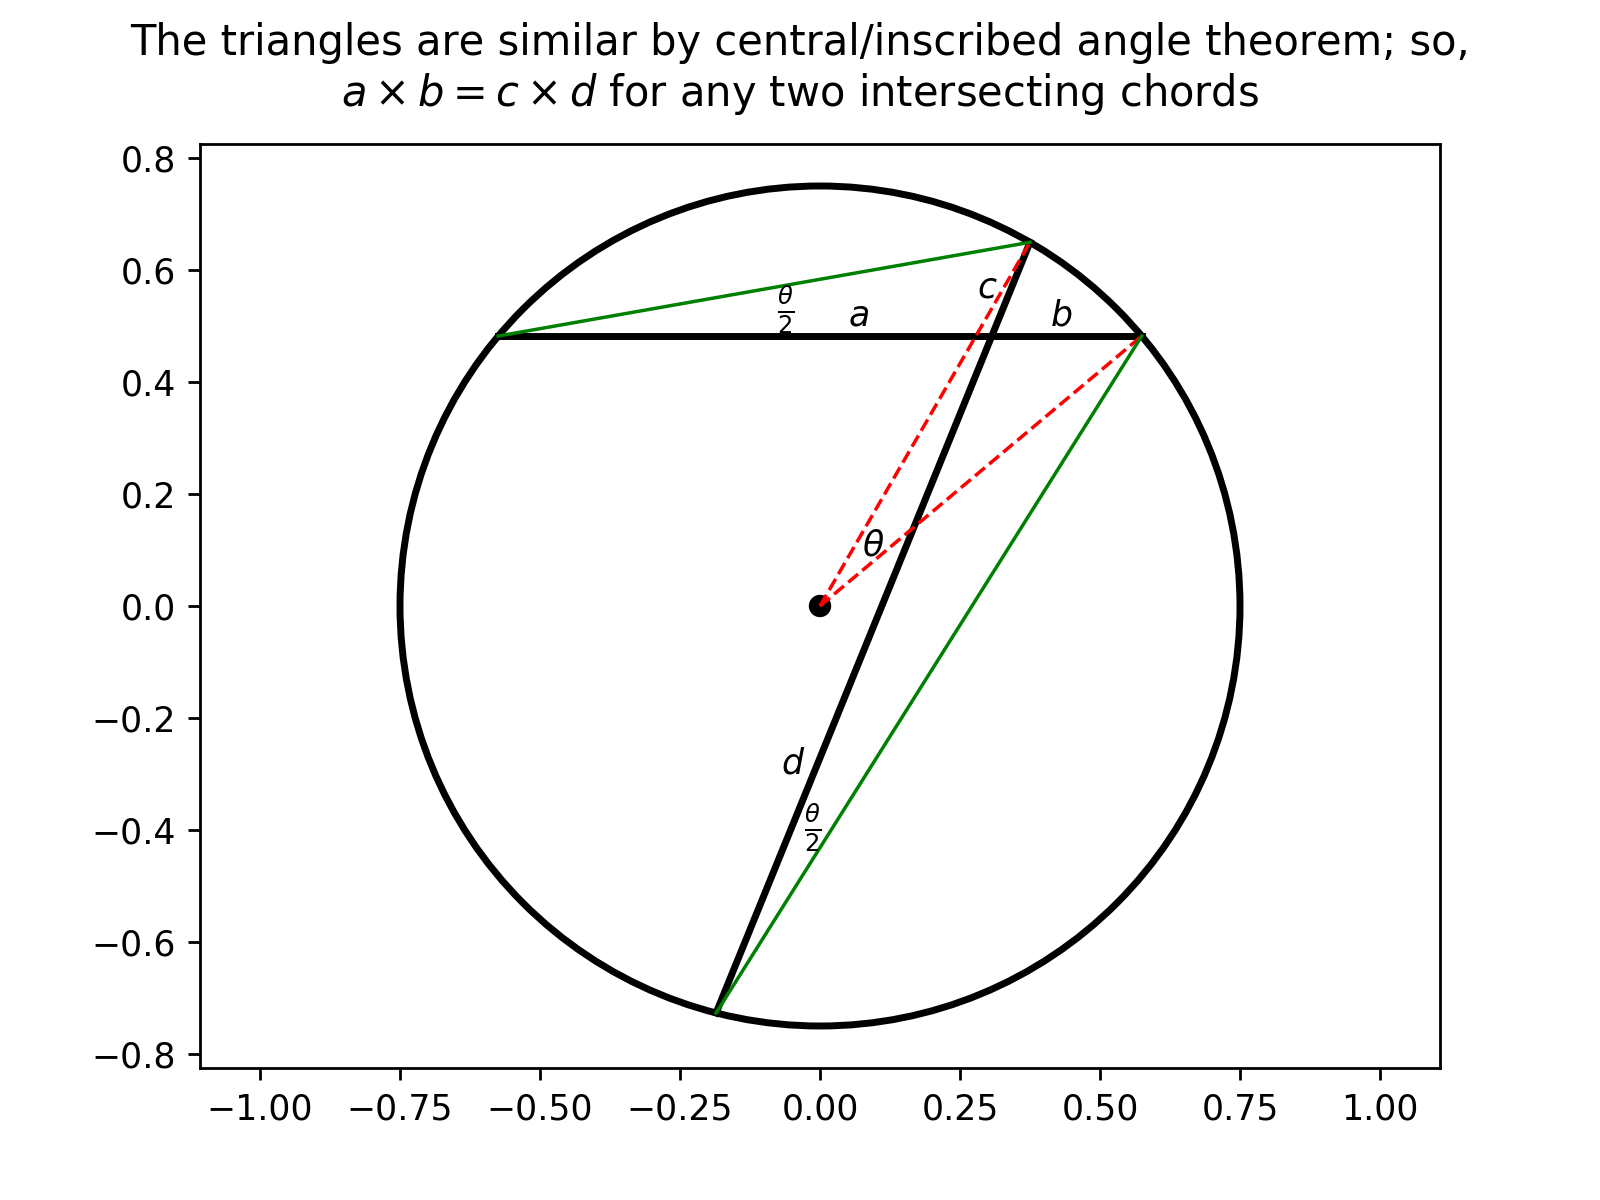

In [30]:
#Make the figures for the intersecting chord theorems
circleRadius = 0.75


# MAKE     _____   FIGURE  ???   ____  <-- Radius of a circle inscribing a triangle

plt.figure()

circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)

#now make the first chord having an angle theta on each side of the (+)Y-axis
theta = math.pi*50.0/180.0  # doesn't have to be an equalateral triangle, 50 degrees will be OK
#note that did some rotations in my head here. theta is not the angle to the points themselves but from the point to y-axis
Y_chord_1 = circleRadius*math.cos(theta)
X_chord_1 = circleRadius*math.sin(theta)


#make the second chord, intersecting the first chord (any intersection would do)
angle_to_X1_chord_2 = math.pi*60.0/180.0  #just a bit of rotation from the start of the first chord
X1_chord_2          = circleRadius*math.cos( angle_to_X1_chord_2 )
Y1_chord_2          = circleRadius*math.sin( angle_to_X1_chord_2 )

angle_to_X2_chord_2 = 3.0*math.pi/2.0 -0.25 #adjust a bit so edge of line isn't so visible
X2_chord_2          = circleRadius*math.cos( angle_to_X2_chord_2)
Y2_chord_2          = circleRadius*math.sin( angle_to_X2_chord_2)

firstChord  = plt.Line2D((-X_chord_1, X_chord_1 ), (Y_chord_1,  Y_chord_1),  lw=2, c='k')
secondChord = plt.Line2D((X1_chord_2, X2_chord_2), (Y1_chord_2, Y2_chord_2), lw=2, c='k')

#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( firstChord  )
plt.gca().add_line( secondChord )


plt.gca().add_line( plt.Line2D(( 0,X_chord_1),  (0, Y_chord_1), lw=1, c='r', ls='dashed'))
plt.gca().add_line( plt.Line2D(( 0,X1_chord_2), (0, Y1_chord_2), lw=1, c='r',ls='dashed'))

plt.gca().add_line( plt.Line2D((X1_chord_2, -X_chord_1),  (Y1_chord_2,  Y_chord_1), lw=1, c='g'))
plt.gca().add_line( plt.Line2D((X_chord_1,  X2_chord_2),  (Y_chord_1,  Y2_chord_2), lw=1, c='g'))

#Now, add some annotations
firstChordLeft    = plt.text( 0.05, 0.5, r"$a$")
firstChordRight   = plt.text( 0.41, 0.5, r"$b$")

secondChordBottom = plt.text(-0.07, -0.30, r"$d$")
secondChordTop    = plt.text( 0.28,  0.55, r"$c$")
centralAngle      = plt.text( 0.075,  0.09, r"$\theta$")
inscribedAngle1   = plt.text(-0.028,  -0.415, r"$\frac{\theta}{2}$")
inscribedAngle2   = plt.text(-0.077,   0.51,   r"$\frac{\theta}{2}$")

plt.show()
plt.axis('equal')
plt.suptitle(\
            "The triangles are similar by central/inscribed angle theorem; so,\n"+ \
             r"$a \times b = c \times d$ for any two intersecting chords")

plt.savefig("./img/IntersectingChordTheorem.jpg")


<IPython.core.display.Javascript object>


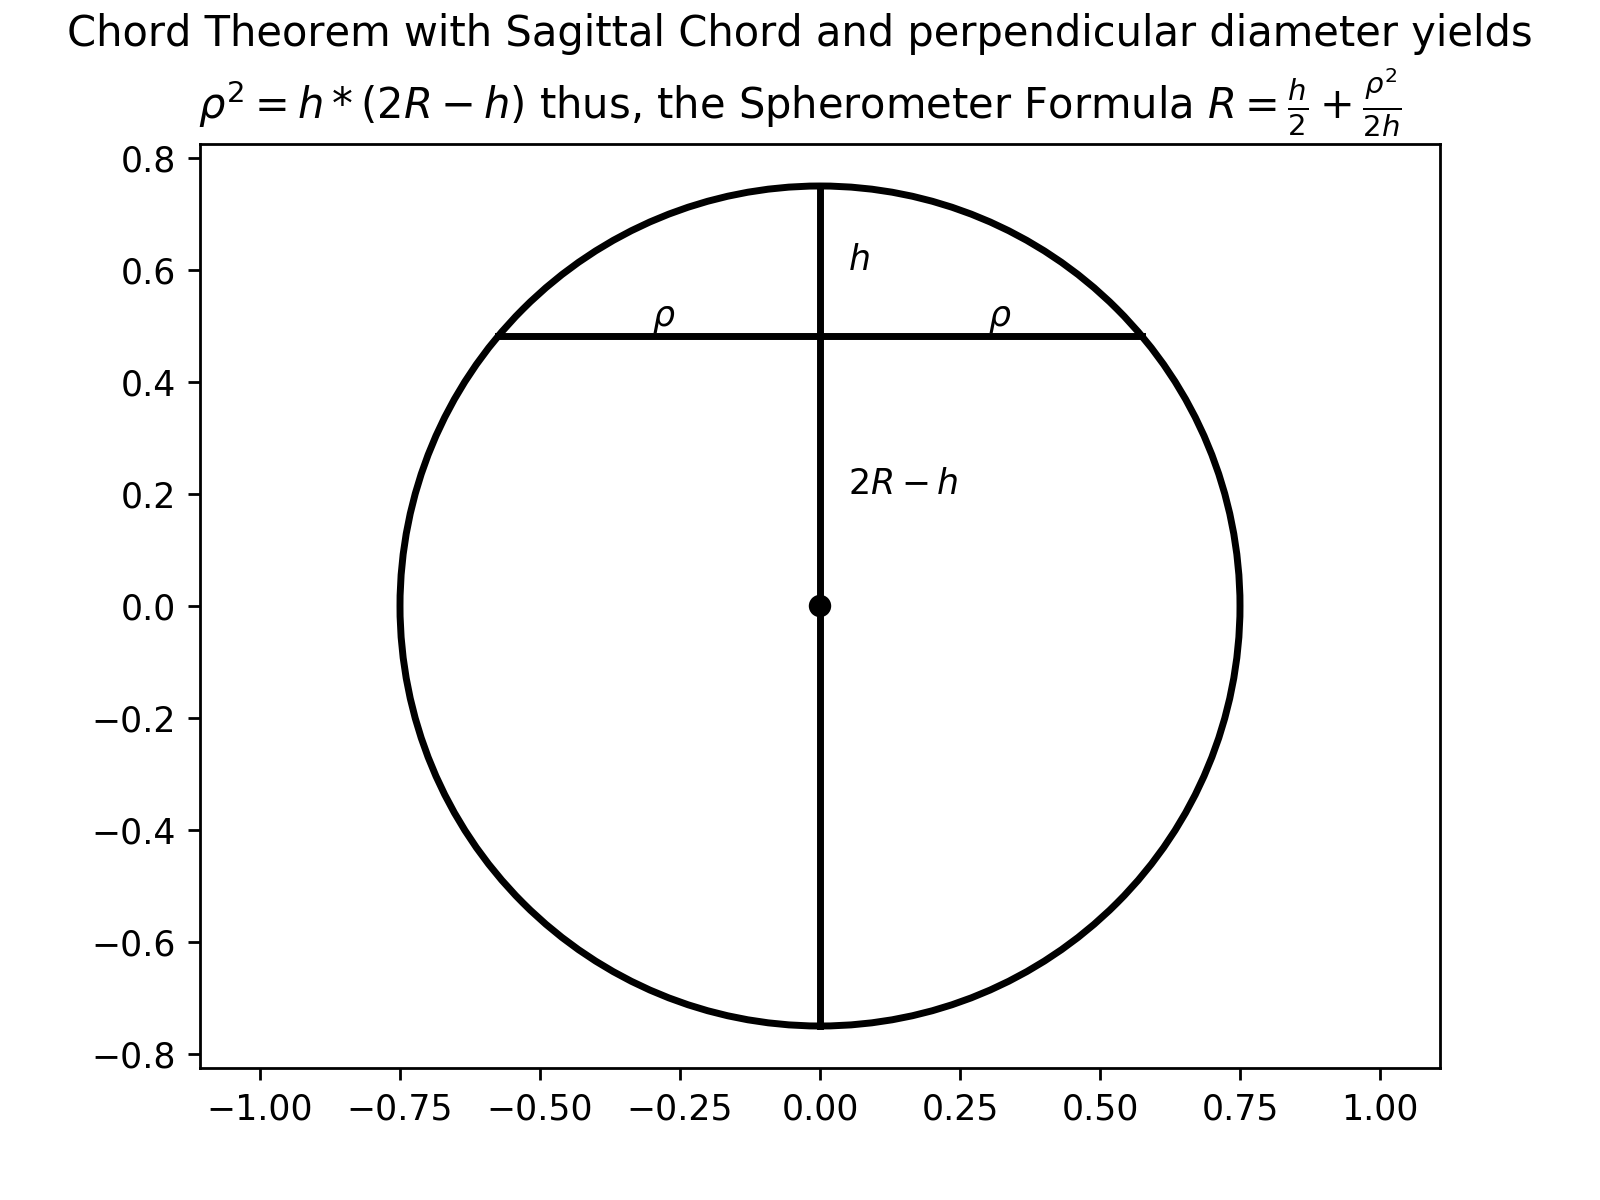

In [31]:


# MAKE     _____   FIGURE  ???   ____  <-- Sagittal chord intersecting a perpendicular diameter

plt.figure()

circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)

#now make the first chord having an angle theta on each side of the (+)Y-axis
theta = math.pi*50.0/180.0  # doesn't have to be an equalateral triangle, 50 degrees will be OK
#note that did some rotations in my head here. theta is not the angle to the points themselves but from the point to y-axis
Y_chord_1 = circleRadius*math.cos(theta)
X_chord_1 = circleRadius*math.sin(theta)


#make a perpendicular diameter (the second chord), intersecting the first chord
angle_to_X1_chord_2 = math.pi/2.0
X1_chord_2          = circleRadius*math.cos( angle_to_X1_chord_2 )
Y1_chord_2          = circleRadius*math.sin( angle_to_X1_chord_2 )

angle_to_X2_chord_2 = 3.0*math.pi/2.0  #or, equivalently -math.pi/2.0
X2_chord_2          = circleRadius*math.cos( angle_to_X2_chord_2)
Y2_chord_2          = circleRadius*math.sin( angle_to_X2_chord_2)

firstChord  = plt.Line2D((-X_chord_1, X_chord_1 ), (Y_chord_1,  Y_chord_1),  lw=2, c='k')
secondChord = plt.Line2D((X1_chord_2, X2_chord_2), (Y1_chord_2, Y2_chord_2), lw=2, c='k')

#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( firstChord  )
plt.gca().add_line( secondChord )



#Now, add some annotations
firstChordLeft    = plt.text(-0.30, 0.5, r"$\rho$")
firstChordRight   = plt.text( 0.30, 0.5, r"$\rho$")

secondChordBottom = plt.text( 0.05,  0.60, r"$h$")
secondChordTop    = plt.text( 0.05,  0.20, r"$2R - h$")

plt.axis('equal')
plt.suptitle(\
            "Chord Theorem with Sagittal Chord and perpendicular diameter yields\n"+ \
             r"$\rho^2 = h*(2R-h)$ thus, the Spherometer Formula $R= \frac{h}{2} + \frac{\rho^2}{2h}$")
plt.show()
plt.savefig("./img/SagittalAndPerpendicularDiameter.jpg")



## Draw a representation of a spherometer sitting on a sphere

<IPython.core.display.Javascript object>


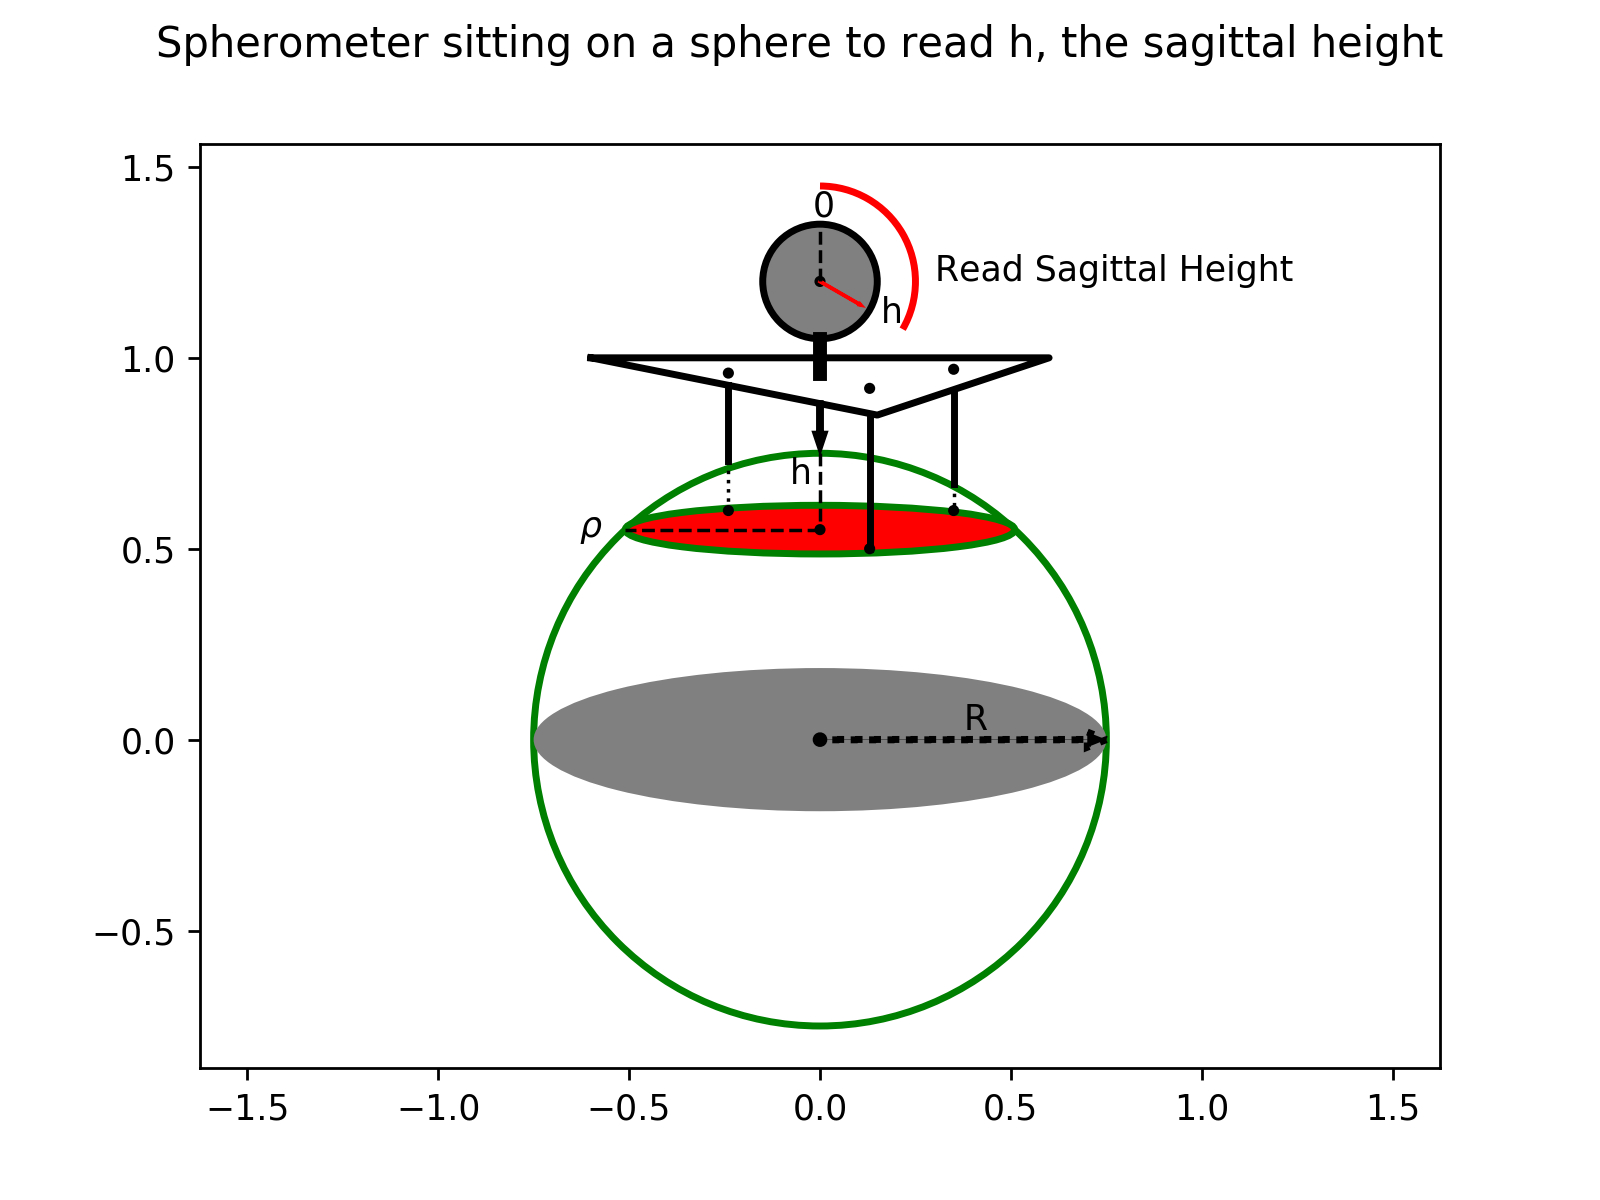

In [9]:


sphereRadius = 0.75
#assuming I'm looking at this thing from an angle of phi above XZ plane, how wide would the equatorial ellipse be?
#I think it would be spherRadius*sin phi
phi = (30.0/180.)*math.pi
equitorialPlaneWidth = sphereRadius * math.sin(phi)
h            = 0.20
Y_sagittalPlane = sphereRadius - h
sagittalRadius = math.sqrt( sphereRadius*sphereRadius - Y_sagittalPlane*Y_sagittalPlane)
sagittalPlaneWidth = sagittalRadius*math.sin(phi) * 0.25 #fudge factor

#print("Y_sagitalPlane=",Y_sagittalPlane)
#print("sagittalRadius=", sagittalRadius)

# MAKE  _____      FIGURE of a SPHERE    ______

plt.figure()

sphere = plt.Circle( (0,0), radius=sphereRadius, ec='green', fc='none', lw=2)
sphereCenter = plt.Circle( (0,0), radius=0.01,   ec='k', fc='k',    lw=2)
equatorialPlane = mpl.patches.Ellipse( (0,0), width=2*sphereRadius, \
                                              height=equitorialPlaneWidth,   fc='grey')
sagittalPlane   = mpl.patches.Ellipse( (0,Y_sagittalPlane), width=2*sagittalRadius, \
                                                            height=2*sagittalPlaneWidth, fc='red', ec='g', lw=2)
showSagittalRadius  = plt.Line2D( (0,-sagittalRadius ),  (Y_sagittalPlane, Y_sagittalPlane), lw=1, c='k', ls='dashed')
sagittalPlaneCenter = plt.Circle( (0,Y_sagittalPlane), radius=0.01, ec='k', fc='k', lw=1)

spherometerBody = plt.Line2D( (-0.6, +0.6, +.15, -0.6), (1.0, 1.0, 0.85, 1.0), lw=2, c='k')
legA            = plt.Line2D( (-.24, -.24), (0.93, 0.73), lw=2, c='k')
legA_hidden     = plt.Line2D( (-.24, -.24), (0.73, 0.60), lw=1, c='k', ls='dotted')
legB            = plt.Line2D( (0.13, 0.13), (0.85, 0.5), lw=2, c='k')
legC            = plt.Line2D( (0.35, 0.35), (0.91,  0.67), lw=2, c='k')
legC_hidden     = plt.Line2D( (0.35, 0.35), (0.67, 0.6), lw=1, c='k', ls='dotted')

legNutA         = plt.Circle( (-0.24, 0.96),  radius=0.01, ec='k', fc='k', lw=1)
legNutB         = plt.Circle( ( 0.13, 0.92),  radius=0.01, ec='k', fc='k', lw=1)
legNutC         = plt.Circle( ( 0.35, 0.97),  radius=0.01, ec='k', fc='k', lw=1)

legAndSphereA   = plt.Circle( (-0.24,0.60), radius=0.01, ec='k', fc='k', lw=1)
legAndSphereB   = plt.Circle( (0.13, 0.50), radius=0.01, ec='k', fc='k', lw=1)
legAndSphereC   = plt.Circle( (0.35, 0.60), radius=0.01, ec='k', fc='k', lw=1)

dialGaugeBody   = plt.Circle( (0.0,  1.20), radius = 0.15,fc='grey', lw=2, ec='k')
dialGaugeCenter = plt.Circle( (0.0,  1.20), radius = 0.01, ec='k',fc='k', lw=1)
dialGaugeZero   = plt.Line2D( (0,0), (1.20, 1.20+0.15), c='k',lw=1, ls='dashed')
#dialGaugeReading= plt.gca().arrow(0, 1.20, 0.12, -0.07, head_width=0.01, head_length=0.02, fc='r', ec='r', lw=1)
#                              center,    width, height, EllipseTilt_CCW_Degrees, startArcDegrees, endArcDegrees
dialGaugeChange = mpl.patches.Arc(    (0.00, 1.20), 0.5, 0.5, 0,   -30, 90, lw=2, color='r' )
dialGaugeReading = plt.gca().arrow(0.00, 1.20, 0.8*0.15*math.cos(-30*math.pi/180), 0.8*0.15*math.sin(-30*math.pi/180), fc='r',ec='r')
                                  
dialGaugeBushing= plt.Line2D( (0.0,  0.0 ), (1.05, 0.957), lw=4, c='k')

dialGaugeProbe  = plt.gca().arrow(0, 0.88,  \
                                  0, (sphereRadius-0.88+0.05),   head_width=0.02, head_length=0.03, fc='k', ec='k', lw=2)

dialGaugeProbeToZero = plt.Line2D((0,0), (sphereRadius, Y_sagittalPlane), lw=1, c='k', ls='dashed')
0.12, 1.13

showSphereRadius = plt.gca().arrow(0,0, sphereRadius-0.05,0,  head_width=0.04, head_length=0.05, \
                                   fc='k', ec='k', lw=2, ls='dotted')


plt.gca().add_patch(sphere)
plt.gca().add_patch(equatorialPlane)
plt.gca().add_patch(sagittalPlane)

plt.gca().add_patch(sphereCenter)        #draw these center points to be on top of other elements
plt.gca().add_patch(sagittalPlaneCenter)
plt.gca().add_line(showSagittalRadius)
plt.gca().add_line(spherometerBody)
plt.gca().add_line(legA)
plt.gca().add_line(legA_hidden)
plt.gca().add_line(legB)
plt.gca().add_line(legC)
plt.gca().add_line(legC_hidden)

plt.gca().add_patch(legAndSphereA)
plt.gca().add_patch(legAndSphereB)
plt.gca().add_patch(legAndSphereC)

plt.gca().add_patch(dialGaugeBody)
plt.gca().add_patch(dialGaugeCenter)
plt.gca().add_line(dialGaugeZero)
plt.gca().add_patch(dialGaugeChange)
plt.gca().add_line( dialGaugeBushing)
#plt.gca().add_line( dialGaugeProbe  )  #arrows don't have to be added into the object list

plt.gca().add_line( dialGaugeProbeToZero )

plt.gca().add_patch(legNutA)
plt.gca().add_patch(legNutB)
plt.gca().add_patch(legNutC)

#add some annotations
plt.text(sphereRadius/2, 0.025, "R")
plt.text(-0.02, 1.37, "0")
plt.text(0.3, 1.2, "Read Sagittal Height")
plt.text(0.16, 1.09, "h")
plt.text(-0.63, 0.53, r"$\rho$")
plt.text(-0.08, 0.67,"h")


plt.suptitle("Spherometer sitting on a sphere to read h, the sagittal height")
plt.axis("equal")
plt.show()
plt.savefig("./img/My_Spherometer_Line_Drawing.jpg")


<IPython.core.display.Javascript object>


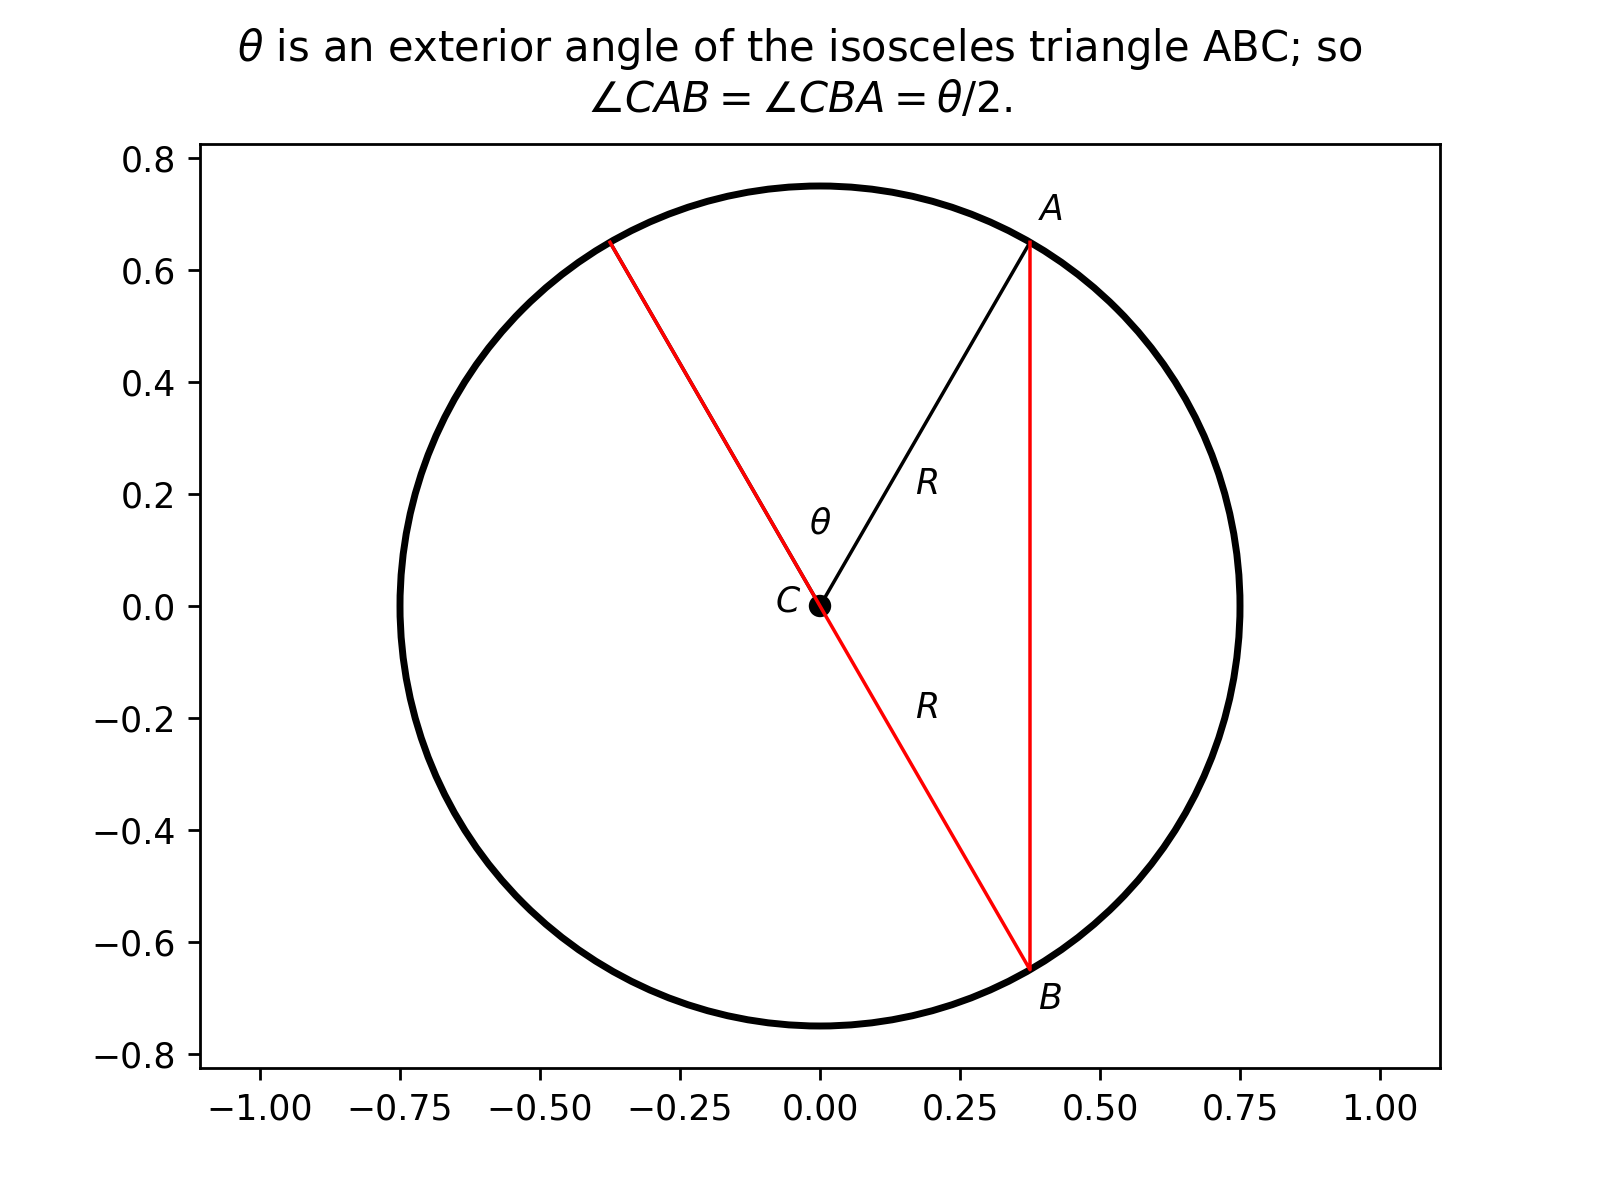

<IPython.core.display.Javascript object>


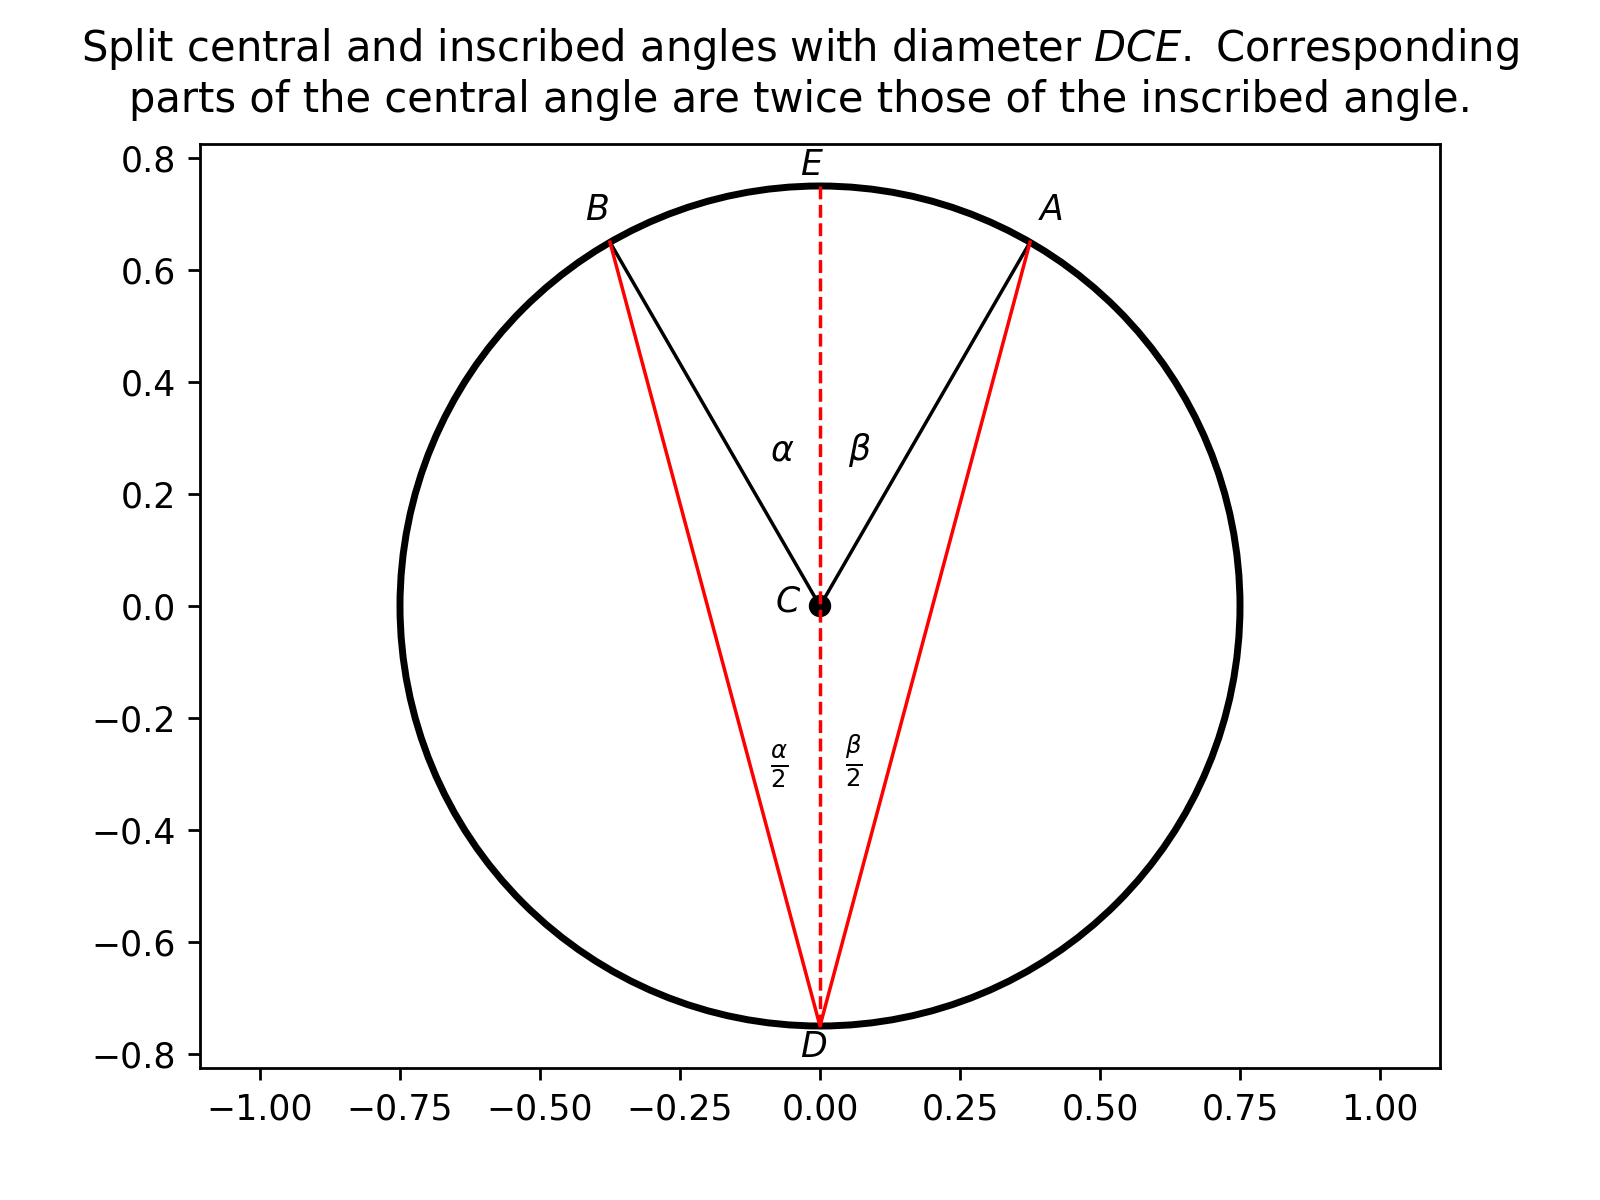

<IPython.core.display.Javascript object>


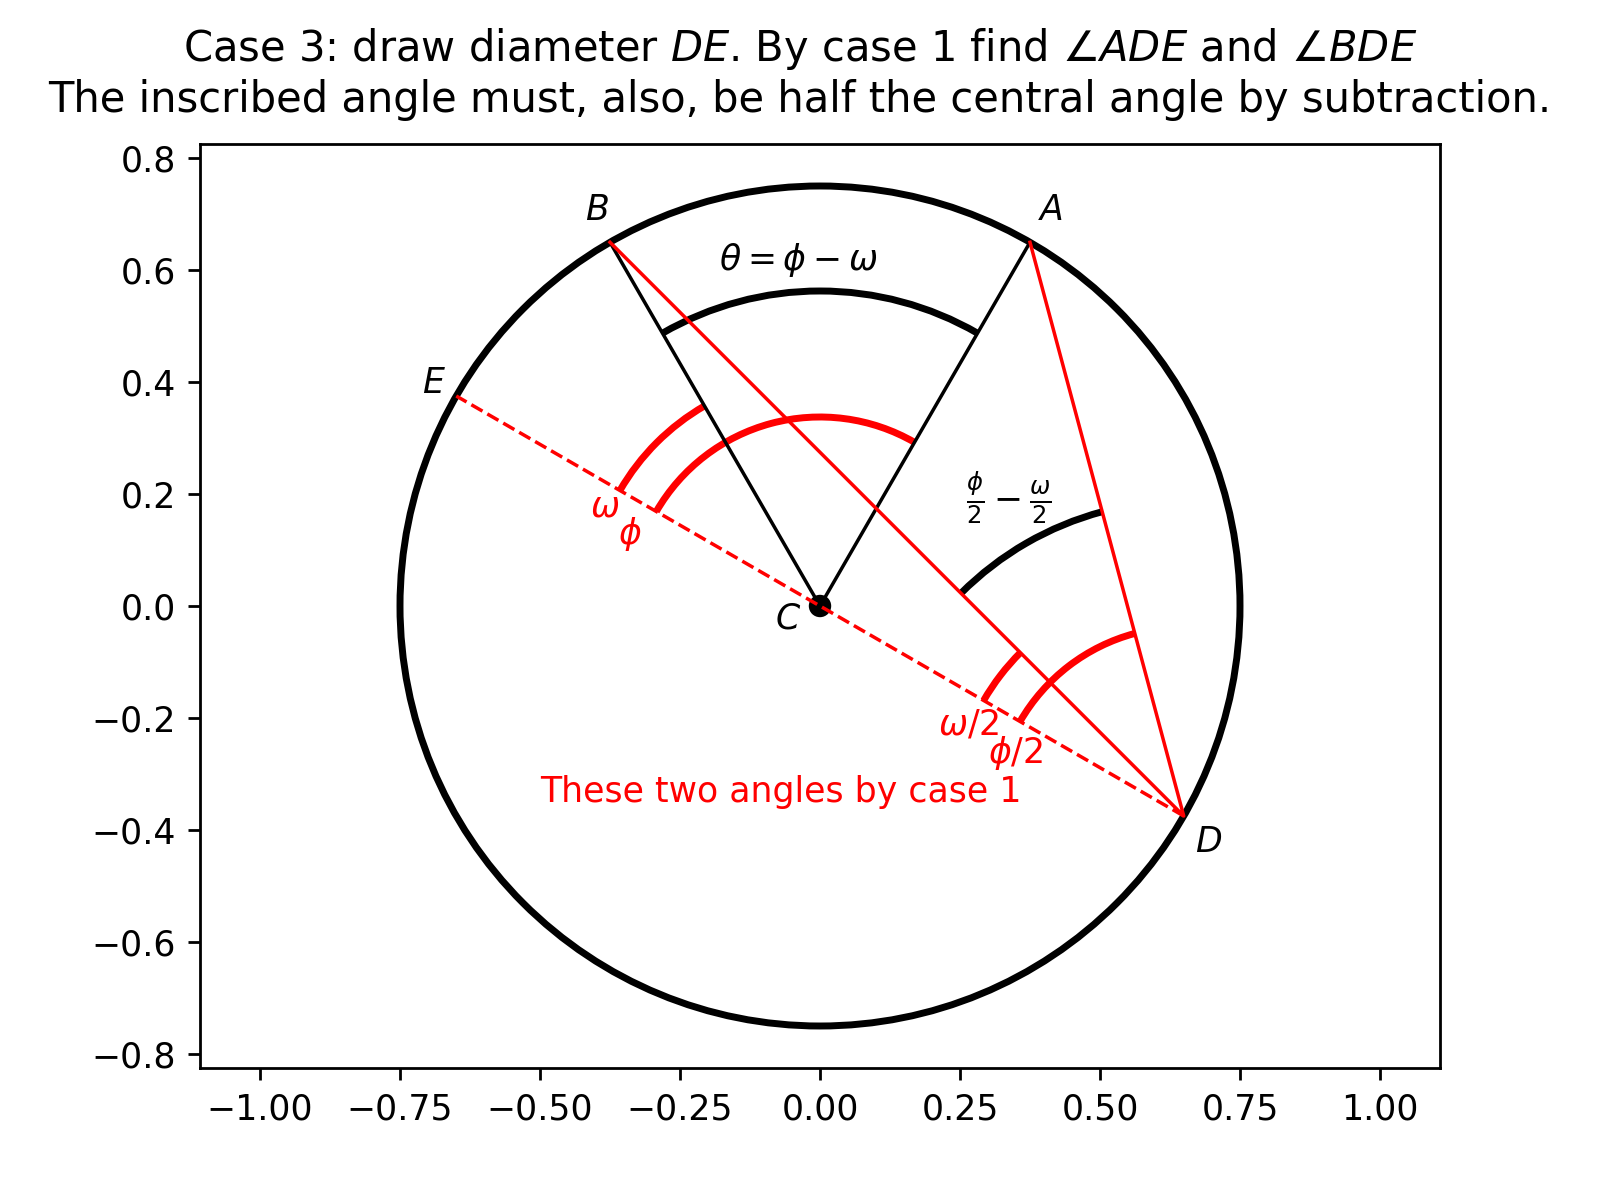

In [12]:
circleRadius = 0.75


# MAKE     _____   FIGURE  2   ____  <-- central angle along a diameter to the inscribed angle

plt.figure()

circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)

#now make the chord having an angle theta on each side of the (+)Y-axis
halfTheCentralAngle = math.pi*30.0/180.0  # doesn't have to be an equalateral triangle, 30 degrees will be OK
rotationToTheSecondRadiusOfTheCentralAngle= 0.5*math.pi + halfTheCentralAngle 

#note that did some rotations in my head here. theta is not the angle to the points themselves but from the point to y-axis
X_chord = circleRadius*math.sin(halfTheCentralAngle) #for convenience +/- around Y axis
Y_chord = circleRadius*math.cos(halfTheCentralAngle)


#specify the point on the circumference for the INSCRIBED ANGLE
#In this specific case it has to make an diameter along one of the central angle radii
#rotation around the circle to the inscribed angle 
rotationToTheInscribedAngle = (3.0/2.0) * math.pi + halfTheCentralAngle
X_inscribedAngle = circleRadius*math.cos( rotationToTheInscribedAngle )
Y_inscribedAngle = circleRadius*math.sin( rotationToTheInscribedAngle )

#Draw the central angle, i.e., the angle from the center of the circle
#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( plt.Line2D(( -X_chord, 0, X_chord),\
                               (  Y_chord, 0, Y_chord), lw=1, c='k'))

#Draw the inscribed angle
plt.gca().add_line( plt.Line2D((-X_chord, X_inscribedAngle, X_chord), \
                               ( Y_chord, Y_inscribedAngle, Y_chord), lw=1, c='r'))


#Now, add some annotations

centralAngle      = plt.text(-0.02,  0.13, r"$\theta$")
plt.text( 0.17, 0.20, r"$R$")
plt.text( 0.17,-0.20, r"$R$")
plt.text( 0.39, 0.69, r"$A$")
plt.text( 0.39,-0.72, r"$B$")
plt.text(-0.08,-0.01, r"$C$")
#angleTheta=plt.gca().arrow(0.00, 1.20, 0.8*0.15*math.cos(-30*math.pi/180), 0.8*0.15*math.sin(-30*math.pi/180), fc='r',ec='r')
                   
#inscribedAngle1   = plt.text(-0.028,  -0.415, r"$\frac{\theta}{2}$")
#inscribedAngle2   = plt.text(-0.077,   0.51,   r"$\frac{\theta}{2}$")

plt.axis('equal')
plt.suptitle(r"$\theta$"+" is an exterior angle of the isosceles triangle ABC; so\n" +\
             r"$\angle{CAB}=\angle{CBA}=\theta/2$.")
plt.show()
plt.savefig("./img/CentralAngleTheorem_Case_1.jpg")



# MAKE     _____   FIGURE  3   ____  <-- central angle along a diameter inside the inscribed angle

plt.figure()

circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)
#specify the point on the circumference for the INSCRIBED ANGLE
#In this specific case it has to make an diameter along one of the central angle radii
#rotation around the circle to the inscribed angle 
rotationToTheInscribedAngle = (3.0/2.0) * math.pi 
X_inscribedAngle = circleRadius*math.cos( rotationToTheInscribedAngle )
Y_inscribedAngle = circleRadius*math.sin( rotationToTheInscribedAngle )

#Draw the central angle, i.e., the angle from the center of the circle
#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( plt.Line2D(( -X_chord, 0, X_chord),\
                               (  Y_chord, 0, Y_chord), lw=1, c='k'))

#Draw the inscribed angle
plt.gca().add_line( plt.Line2D((-X_chord, X_inscribedAngle, X_chord), \
                               ( Y_chord, Y_inscribedAngle, Y_chord), lw=1, c='r'))
#Draw in a diameter from the inscribe angle
plt.gca().add_line( plt.Line2D( (0,0), (circleRadius, -circleRadius), lw=1, c='r', ls='dashed'))

#Now, add some annotations

#centralAngle      = plt.text(-0.02,  0.13, r"$\theta$")
#plt.text( 0.17, 0.20, r"$R$")
#plt.text( 0.17,-0.20, r"$R$")
plt.text( 0.39, 0.69, r"$A$")
plt.text(-0.42, 0.69, r"$B$")
plt.text(-0.08,-0.01, r"$C$")
plt.text(-0.035,-0.805, r"$D$")
plt.text(-0.035, 0.77,  r"$E$")
plt.text(-0.09,  0.26, r"$\alpha$")
plt.text( 0.05,  0.26, r"$\beta$" )

plt.text( -0.090, -0.3, r"$\frac{\alpha}{2}$")
plt.text(  0.045, -0.3, r"$\frac{\beta} {2}$")

plt.axis('equal')
plt.suptitle("Split central and inscribed angles with diameter "+r"$DCE.$" +" Corresponding\n" +\
             "parts of the central angle are twice those of the inscribed angle.")
plt.show()
plt.savefig("./img/CentralAngleTheorem_Case_2.jpg")



# MAKE     _____   FIGURE  4   ____  <-- central angle along a diameter inside
#                                        and outside of the inscribed angle

plt.figure()

circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)
#specify the point on the circumference for the INSCRIBED ANGLE
#In this specific case it has to make an diameter along one of the central angle radii
#rotation around the circle to the inscribed angle 
rotationToTheInscribedAngle = (-1.0/6.0) * math.pi 
X_inscribedAngle = circleRadius*math.cos( rotationToTheInscribedAngle )
Y_inscribedAngle = circleRadius*math.sin( rotationToTheInscribedAngle )

#Draw the central angle, i.e., the angle from the center of the circle
#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( plt.Line2D(( -X_chord, 0, X_chord),\
                               (  Y_chord, 0, Y_chord), lw=1, c='k'))

#print("X_inscribedAngle=", X_inscribedAngle, " Y_inscribedAngle=", Y_inscribedAngle)

#Draw the inscribed angle
plt.gca().add_line( plt.Line2D((-X_chord, X_inscribedAngle, X_chord), \
                               ( Y_chord, Y_inscribedAngle, Y_chord), lw=1, c='r'))
#Draw in a diameter from the inscribe angle through the center
plt.gca().add_line( plt.Line2D( ( X_inscribedAngle, -X_inscribedAngle), \
                                ( Y_inscribedAngle, -Y_inscribedAngle),\
                                lw=1, c='r', ls='dashed'))

#Now, add some annotations

plt.text( 0.39, 0.69,  r"$A$")
plt.text(-0.42, 0.69,  r"$B$")
plt.text(-0.08,-0.04,  r"$C$")
plt.text( 0.67,-0.44,  r"$D$")
plt.text(-0.71, 0.38,  r"$E$")
plt.text(-0.36, 0.11,  r"$\phi$",   color='r')
plt.text(-0.41, 0.16,  r"$\omega$", color='r')
plt.text(-0.18, 0.60,  r"$\theta =\phi - \omega$",color='k')
plt.text( 0.30,-0.28,r"$\phi/2$", color='r')
plt.text( 0.21,-0.229,r"$\omega/2$", color='r')
plt.text(-0.50,-0.35, r"These two angles by case 1", color='r')
plt.text( 0.26, 0.17, r"$\frac{\phi}{2}-\frac{\omega}{2}$", color='k')


anglePhi = mpl.patches.Arc( (0,0), 0.9*circleRadius, 0.9*circleRadius, 0,\
                        ((0.5*math.pi)-halfTheCentralAngle)*(180.0/math.pi),\
                        ((    math.pi)-halfTheCentralAngle)*(180.0/math.pi),\
                        lw=2, color='r')
plt.gca().add_patch(anglePhi)


#now, what IS the angle of the line from D to A?
angleToLineDA_fromInscribedAngle = math.atan2( (Y_chord-Y_inscribedAngle), (X_chord-X_inscribedAngle)) #in radians
#print("angleToLineDA_fromInscribedAngle in deg=", angleToLineDA_fromInscribedAngle*180.0/math.pi)
angleToLineDC_fromInscribedAngle = math.atan2( (0.0-Y_inscribedAngle), (0.0-X_inscribedAngle)) #in radians
angleHalfPhi=mpl.patches.Arc((X_inscribedAngle,Y_inscribedAngle),\
                             0.9*circleRadius, 0.9*circleRadius, 0,\
                             angleToLineDA_fromInscribedAngle*(180.0/math.pi),\
                             angleToLineDC_fromInscribedAngle*(180.0/math.pi),\
                             lw=2, color='r')
plt.gca().add_patch(angleHalfPhi)



#Identify Omega, the central angle from B to the diameter across from D
rotationToOmegaStartDeg = ((0.5*math.pi)+halfTheCentralAngle)     * (180.0/math.pi)
rotationToOmegaEndDeg   = (rotationToTheInscribedAngle - math.pi) * (180.0/math.pi)

#apparently, height and width are full object sizes, not offsets from zero to top or right extreme
#so, need a factor of a bit more than 2.0 to get the arc drawn outside of the circle, here.
#also, the arcs seem to need counter clockwise degrees for both start and ending arc degrees
#                          center,    width, height, EllipseTilt_CCW_Degrees, startArcDegrees, endArcDegrees
angleOmega = mpl.patches.Arc((0, 0),     1.1*circleRadius, 1.1*circleRadius,    0,  \
                              rotationToOmegaStartDeg, rotationToOmegaEndDeg,\
                             lw=2, color='r' )
plt.gca().add_patch(angleOmega)

#now, what Is the angle of the line DB
angleToLineDB_fromInscribedAngle    = math.atan2( (Y_chord-Y_inscribedAngle), (-X_chord-X_inscribedAngle)) #in radian
angleToLineDB_fromInscribedAngleDeg = angleToLineDB_fromInscribedAngle * (180.0/math.pi)
angleHalfOmega = mpl.patches.Arc( (X_inscribedAngle, Y_inscribedAngle),\
                                  1.1*circleRadius, 1.1*circleRadius, 0,\
                                  angleToLineDB_fromInscribedAngleDeg,\
                                  angleToLineDC_fromInscribedAngle*(180.0/math.pi),\
                                  lw=2, color='r')
plt.gca().add_patch(angleHalfOmega)



#now, draw an arc showing the differece between phi and omega. That will be theta, the arc of interest
rotationToTheInscribedAngleDeg =  ((0.5*math.pi)-halfTheCentralAngle)*(180.0/math.pi)
angleTheta = mpl.patches.Arc((0,0),      1.5*circleRadius, 1.5*circleRadius, 0, \
                             rotationToTheInscribedAngleDeg, rotationToOmegaStartDeg,\
                             lw=2, color='k')
plt.gca().add_patch(angleTheta)

angleHalfTheta=mpl.patches.Arc((X_inscribedAngle, Y_inscribedAngle),\
                               1.5*circleRadius, 1.5*circleRadius, 0,\
                               angleToLineDA_fromInscribedAngle*(180.0/math.pi),\
                               angleToLineDB_fromInscribedAngle*(180.0/math.pi),\
                               lw=2, color='k')
plt.gca().add_patch(angleHalfTheta)

#plt.text(-0.09,  0.26, r"$\alpha$")
#plt.text( 0.05,  0.26, r"$\beta$" )

#plt.text( -0.090, -0.3, r"$\frac{\alpha}{2}$")
#plt.text(  0.045, -0.3, r"$\frac{\beta} {2}$")

plt.axis('equal')
plt.suptitle(r"Case 3: draw diameter $DE$. By case 1 find $\angle ADE$ and $\angle BDE$"+\
             "\nThe inscribed angle must, also, be half the central angle by subtraction.")
plt.show()
plt.savefig("./img/CentralAngleTheorem_Case_3.jpg")


<IPython.core.display.Javascript object>


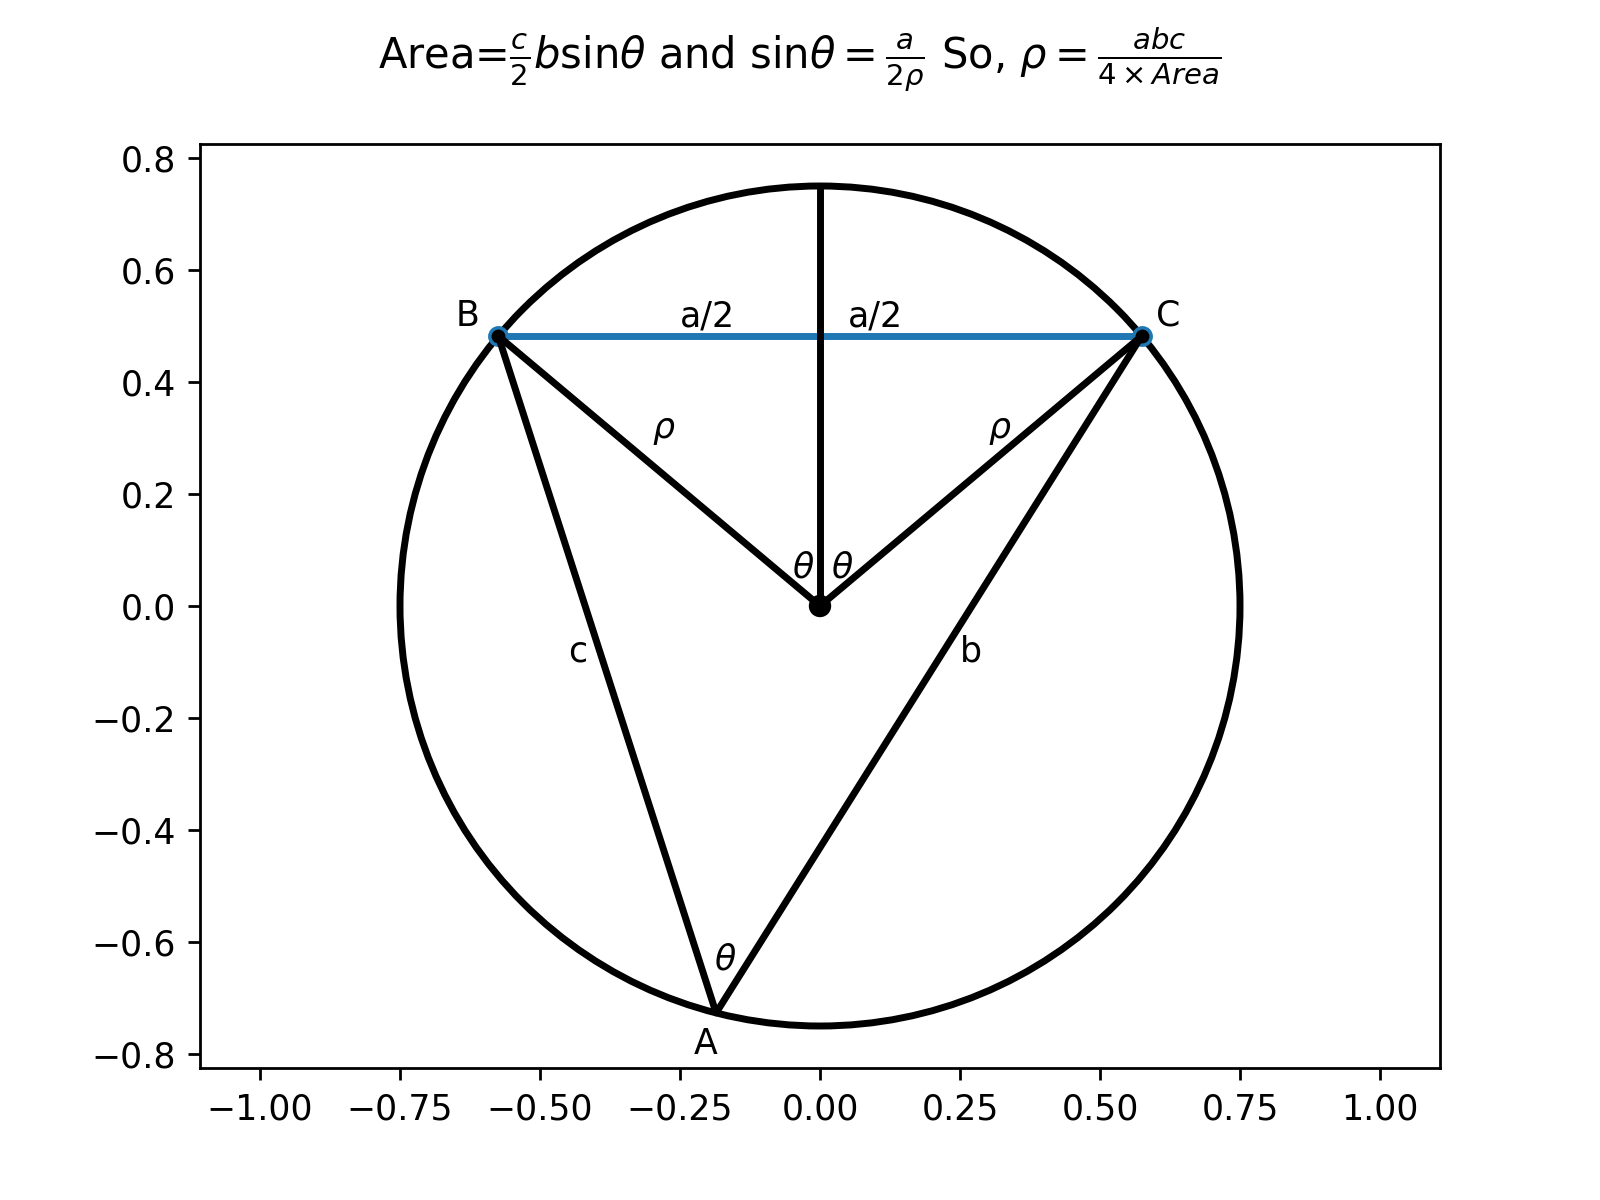

<IPython.core.display.Javascript object>


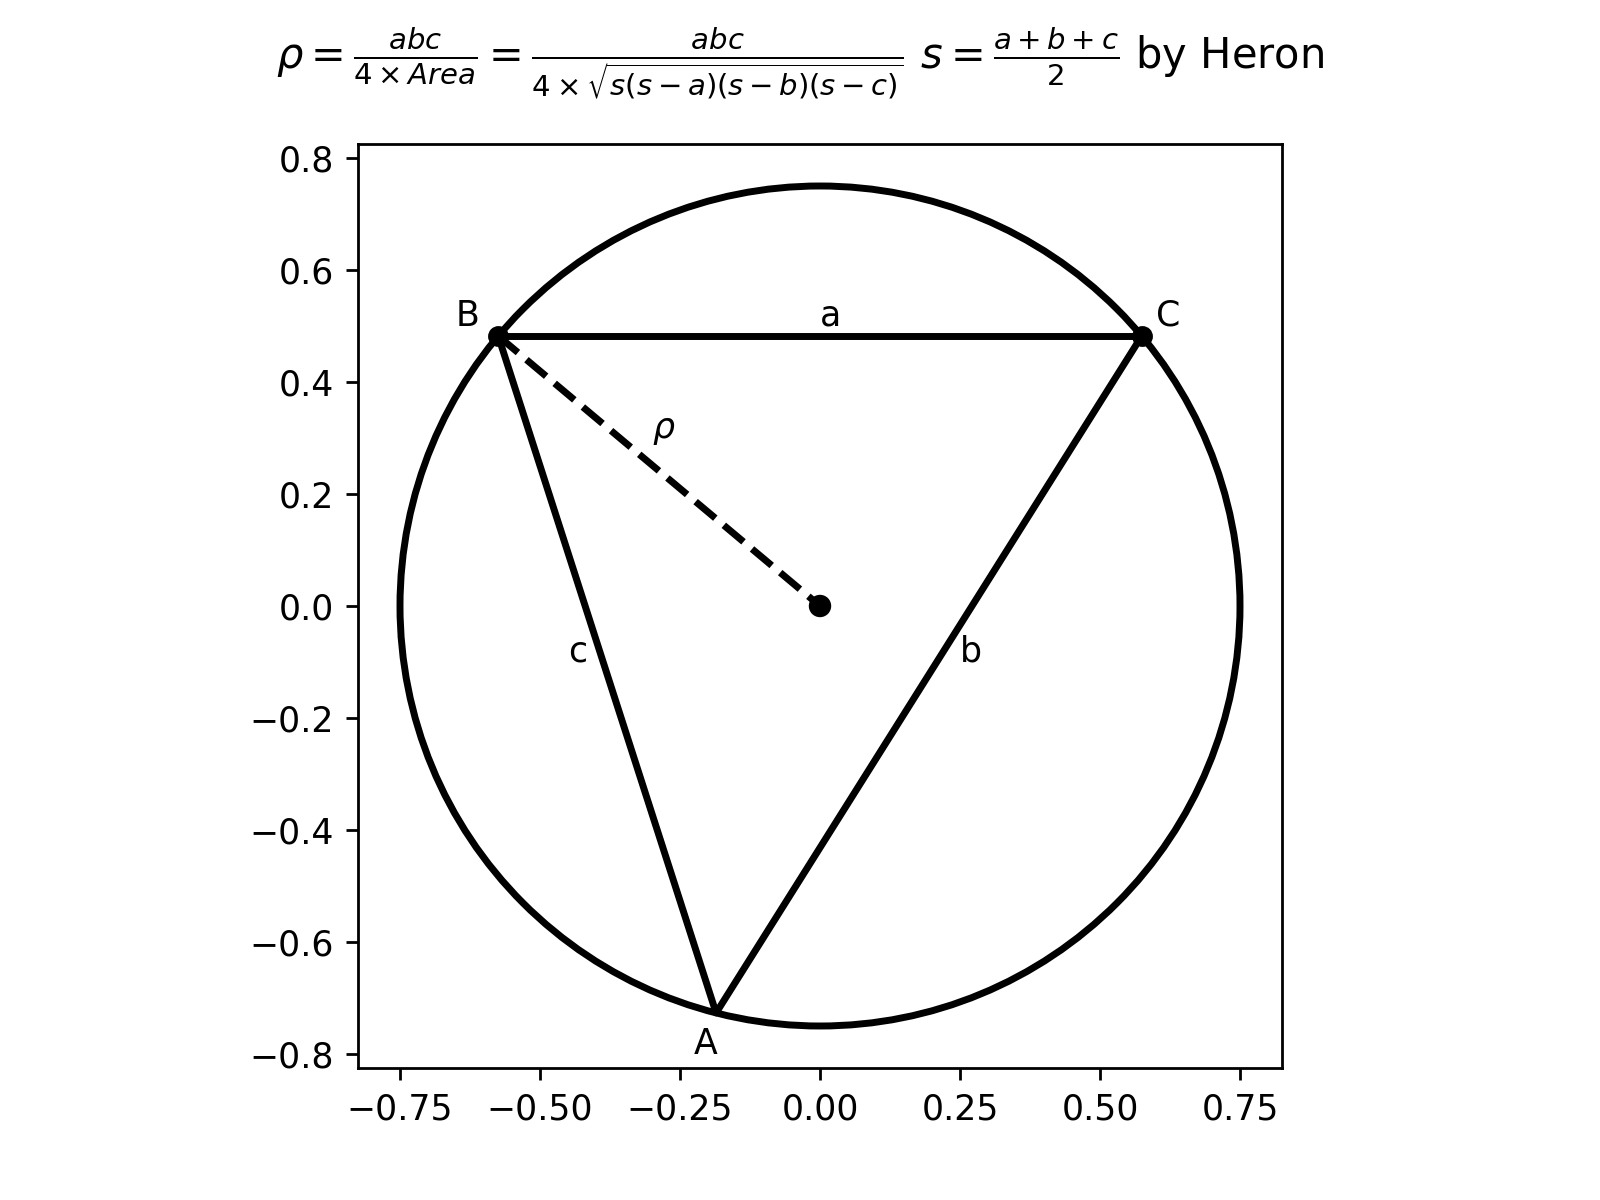

In [20]:
# Make the figures for the cirle circumscribing the the triangle defined by the three feeet of the spherometer


circleRadius = 0.75


# MAKE     _____   FIGURE  1   ____  <-- Radius of a circle inscribing a triangle
#plt.axes()
plt.figure()

#  args:      plt.Circle( (xCenter, yCenter), radius=R, ec='EdgeColor', fc='FaceColor', lw=LineWidth)
#circle     = plt.Circle((0, 0), radius=0.75, ec='k', fc='y')
circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)

#now make one edge of triangle be the sagittal chord having an angle theta on each side of the (+)Y-axis
theta = math.pi*50.0/180.0  # doesn't have to be an equalateral triangle, 50 degrees will be OK
#note that did some rotations in my head here. theta is not the angle to the points themselves but from the point to y-axis
Y_sagittal = circleRadius*math.cos(theta)
X_sagittal = circleRadius*math.sin(theta)


#allow the third leg to be placed anywhere that the center is within the triangle formed by the 3 legs.
angle_to_thirdLeg = 3.0*math.pi/2.0 - 0.25
X_thirdLeg        = circleRadius*math.cos( angle_to_thirdLeg )
Y_thirdLeg        = circleRadius*math.sin( angle_to_thirdLeg )


angleToLegA       = 3.0*math.pi/2.0 - 0.25  #just a random point on the circle, but such that the circle center is inside
X_A               =  circleRadius*math.cos(angleToLegA)
Y_A               =  circleRadius*math.sin(angleToLegA)
X_B               = -circleRadius*math.sin(theta)  #note I have manually done the rotations to make this simple for B & C
Y_B               =  circleRadius*math.cos(theta)
X_C               =  circleRadius*math.sin(theta)
Y_C               =  circleRadius*math.cos(theta)

X_legs            = (X_A, X_B, X_C)
Y_legs            = (Y_A, Y_B, Y_C)


#                   Line2d( (x-values..., y-values)   ...) <---becareful(!) not coordinates!
sagittalChord = plt.Line2D((-X_sagittal, X_sagittal), (Y_sagittal, Y_sagittal), lw=2, marker='.', markersize=10, markerfacecolor='k')
twoRadii      = plt.Line2D((-X_sagittal, 0.0, X_sagittal      ), (Y_sagittal, 0.0, Y_sagittal), lw=2, c='k')
twoEdgesFromThirdLeg = plt.Line2D((-X_sagittal, X_thirdLeg, X_sagittal), (Y_sagittal, Y_thirdLeg, Y_sagittal), lw=2,c='k')
perpendicularBisectorRadius = plt.Line2D((0.0, 0.0), (0.0, circleRadius), lw=2, c='k')

#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( sagittalChord )
plt.gca().add_line( twoRadii )
plt.gca().add_line( twoEdgesFromThirdLeg )

plt.gca().add_line(perpendicularBisectorRadius)

#Now, add some annotations
chordLeftRho    = plt.text(-0.3, 0.3, r"$\rho$")
chordRightRho   = plt.text( 0.3, 0.3, r"$\rho$")

legA            = plt.text(-0.225, -0.8, "A")
legB            = plt.text(-0.65,   0.5, 'B')
legC            = plt.text( 0.60,   0.5, 'C')

edgeC           = plt.text( -0.45,  -0.1,  "c")
edgeB           = plt.text(  0.25,  -0.1,  "b")
edgeLeftHalfA   = plt.text( -0.25,   0.5, "a/2")
edgeRightHalfA  = plt.text(  0.05,   0.5,  "a/2")




centralAngleLeftHalf  = plt.text(-0.05, 0.05, r"$\theta$")
centralAngleRightHalf = plt.text( 0.02, 0.05, r"$\theta$")
foo = plt.text(-0.19, -0.65, r"$\theta$")

plt.axis('equal')
plt.suptitle(\
            r"Area=$\frac{c}{2}b\sin\theta$ and $\sin\theta=\frac{a}{2\rho}$ So, " +\
            r"$\rho=\frac{abc}{4\times Area}$")
plt.show()
plt.savefig("./img/AreaByTrig.jpg")




# MAKE     _____   FIGURE  2   ____  <-- Area of a triangle by Heron's Formula
plt.figure()

circle      = plt.Circle((0, 0), radius=circleRadius, ec='k', fc='none', lw=2)
centerPoint = plt.Circle( (0,0), radius =0.02, fc='k')
plt.gca().add_patch(circle)
plt.gca().add_patch(centerPoint)



#                   Line2d( (x-values..., y-values)   ...) <---becareful(!) not coordinates!
sagittalChord = plt.Line2D((-X_sagittal, X_sagittal), (Y_sagittal, Y_sagittal), lw=2, marker='.', markersize=10, c='k', markerfacecolor='k')
oneRadius      = plt.Line2D((-X_sagittal, 0.0),                   (Y_sagittal, 0.0), \
                            ls='dashed', lw=2, c='k')        
twoEdgesFromThirdLeg = plt.Line2D((-X_sagittal, X_thirdLeg, X_sagittal), (Y_sagittal, Y_thirdLeg, Y_sagittal), lw=2,c='k')
#perpendicularBisectorRadius = plt.Line2D((0.0, 0.0), (0.0, circleRadius), lw=2, c='k')

#N.B. line2D() is an Artist in its own right, so it is not added as a patch, just as a line
plt.gca().add_line( sagittalChord )
plt.gca().add_line( oneRadius )
plt.gca().add_line( twoEdgesFromThirdLeg )

#plt.gca().add_line(perpendicularBisectorRadius)

#Now, add some annotations
chordLeftRho    = plt.text(-0.3, 0.3,  r"$\rho$")

legA            = plt.text(-0.225, -0.8, "A")
legB            = plt.text(-0.65,   0.5, 'B')
legC            = plt.text( 0.60,   0.5, 'C')

edgeC           = plt.text( -0.45,  -0.1,  "c")
edgeB           = plt.text(  0.25,  -0.1,  "b")
edgeA           = plt.text( -0.0,    0.5,  "a")


plt.axis('scaled')
plt.suptitle( r"$\rho=\frac{abc}{4\times Area}=\frac{abc}{4\times\sqrt{s(s-a)(s-b)(s-c)}}$ "+\
              r"$s=\frac{a+b+c}{2}$ by Heron")
plt.show()
plt.savefig("./img/AreaOfTriangleByHeron.jpg")


 

<IPython.core.display.Javascript object>


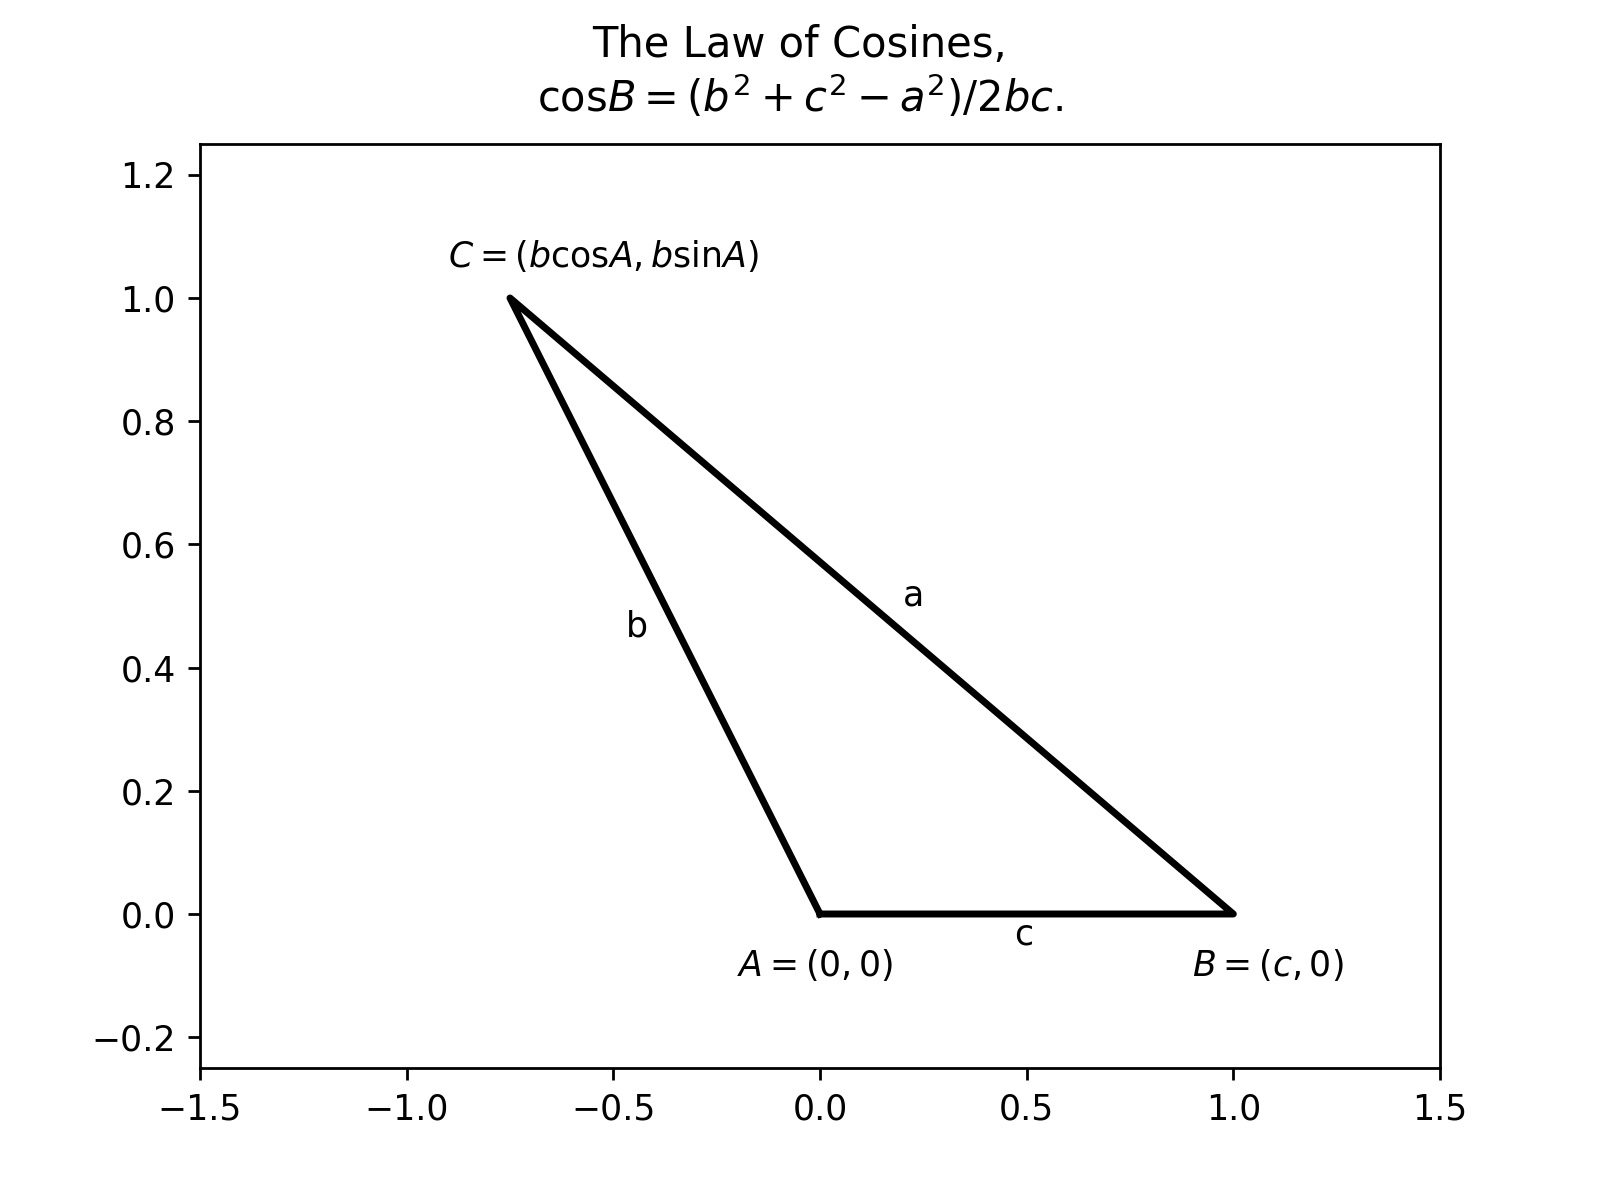

In [21]:
#Make the figure for the law of cosines
plt.figure()
plt.gca().add_line(plt.Line2D( (0, 1, -0.75, 0), (0, 0, 1.0, 0), lw=2, color='k'))

plt.text(-0.20,-0.10, r"$A=(0,0)$")
plt.text( 0.90,-0.10, r"$B=(c,0)$")
plt.text(-0.90, 1.05, r"$C=(b\cosA, b\sinA)$" )
plt.text( 0.20, 0.50,  "a" )
plt.text( 0.47,-0.05,  "c" )
plt.text(-0.47, 0.45,  "b" )

plt.show()
plt.axis((-1.5, 1.5, -0.25, 1.25))
plt.suptitle(\
            "The Law of Cosines,\n"+ \
             r"$\cosB = (b^2+c^2-a^2)/2bc$.")

plt.savefig("./img/LawOfCosines.jpg")
